In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('graph-aug02-2018.csv', index_col='timestamp', parse_dates=True)

In [11]:
df.head(2)

Unnamed: 0  station_id  bikes  spaces  total_docks  \
timestamp                                                                 
2018-02-08 00:08:00           0          89      2      38           40   
2018-02-08 00:08:00           1          83     36       4           40   

                     bike_lag  bike_lag2  bike_lag3  bike_lag4  deposit  ...   \
timestamp                                                                ...    
2018-02-08 00:08:00         2          2          2          2        0  ...    
2018-02-08 00:08:00        36         36         36         36        0  ...    

                     bike_pull3  bike_pull4     rf    rf2    rf3    rf4   std  \
timestamp                                                                       
2018-02-08 00:08:00           2           2   2.00   2.43   2.05   1.84  0.00   
2018-02-08 00:08:00          37          37  35.27  36.23  36.24  36.90  0.52   

                     std2  std3  std4  
timestamp                              
2018-02-08 00:08:00  0.30  0.03  0.11  
2018-02-08 00:08:00  0.16  0.53  0.07  

[2 rows x 26 columns]

In [13]:
df.columns

Index(['Unnamed: 0', 'station_id', 'bikes', 'spaces', 'total_docks',
       'bike_lag', 'bike_lag2', 'bike_lag3', 'bike_lag4', 'deposit', 'hour',
       'day_of_week', 'month', 'weekend', 'bike_pull', 'bike_pull2',
       'bike_pull3', 'bike_pull4', 'rf', 'rf2', 'rf3', 'rf4', 'std', 'std2',
       'std3', 'std4'],
      dtype='object')

In [14]:
df.drop('Unnamed: 0',axis=1)

station_id  bikes  spaces  total_docks  bike_lag  \
timestamp                                                               
2018-02-08 00:08:00          89      2      38           40         2   
2018-02-08 00:08:00          83     36       4           40        36   
2018-02-08 00:08:00          24     17       3           20        17   
2018-02-08 00:08:00          61      2      23           25         2   
2018-02-08 00:08:00         104      8      32           40         8   
2018-02-08 00:08:00          22      8      12           20         8   
2018-02-08 00:08:00         110     28      12           40        28   
2018-02-08 00:08:00          21      0      30           30         0   
2018-02-08 00:08:00          92     35       5           40        35   
2018-02-08 00:08:00          43     20      10           30        20   
2018-02-08 00:08:00          93     40       0           40        40   
2018-02-08 00:08:00          46      7      19           35         7   
2018-02-08 00:08:00          67     26      14           40        26   
2018-02-08 00:08:00          64      0      40           40         1   
2018-02-08 00:08:00          98      3      37           40         3   
2018-02-08 00:08:00          49      4      36           40         4   
2018-02-08 00:08:00          70      4      24           28         4   
2018-02-08 00:08:00          15      9       7           16         9   
2018-02-08 00:08:00           4      0      20           20         0   
2018-02-08 00:08:00          41      1      19           20         1   
2018-02-08 00:08:00          75     23      17           40        23   
2018-02-08 00:08:00          69      0      40           40         0   
2018-02-08 00:08:00          52      0      32           32         0   
2018-02-08 00:08:00           1     14      17           31        14   
2018-02-08 00:08:00          30      4      16           20         4   
2018-02-08 00:08:00           9      8      16           24         8   
2018-02-08 00:08:00          72     31       0           31        31   
2018-02-08 00:08:00          54      3      30           33         3   
2018-02-08 00:08:00         102     18      22           40        18   
2018-02-08 00:08:00          42     29       1           30        29   
...                         ...    ...     ...          ...       ...   
2018-02-08 23:50:00          95     31       9           40        31   
2018-02-08 23:50:00          84     28       2           30        27   
2018-02-08 23:50:00          94     32       8           40        32   
2018-02-08 23:50:00           6      2      18           20         2   
2018-02-08 23:50:00          30      3      17           20         3   
2018-02-08 23:50:00          87     34       4           38        34   
2018-02-08 23:50:00          29     16      13           29        16   
2018-02-08 23:50:00          63      1      34           35         1   
2018-02-08 23:50:00         110     40       0           40        40   
2018-02-08 23:50:00          57      0      23           23         0   
2018-02-08 23:50:00          34     20       9           30        20   
2018-02-08 23:50:00          24      8      12           20         8   
2018-02-08 23:50:00          52      2      30           32         2   
2018-02-08 23:50:00          88     30       0           30        30   
2018-02-08 23:50:00           2     19       1           20        19   
2018-02-08 23:50:00          31      2      18           20         2   
2018-02-08 23:50:00          38     25      15           40        25   
2018-02-08 23:50:00         100     24       1           25        24   
2018-02-08 23:50:00          32      1      29           30         1   
2018-02-08 23:50:00          11      0      30           30         0   
2018-02-08 23:50:00          67     15      25           40        16   
2018-02-08 23:50:00          58      0      40           40         0   
2018-0

In [4]:
df.describe()

Unnamed: 0    station_id         bikes        spaces   total_docks  \
count  77608.000000  77608.000000  77608.000000  77608.000000  77608.000000   
mean   38803.500000     56.045872     11.185380     20.520217     31.880734   
std    22403.644183     32.031551     11.655213     12.358499      7.545294   
min        0.000000      1.000000      0.000000      0.000000     16.000000   
25%    19401.750000     29.000000      1.000000     11.000000     29.000000   
50%    38803.500000     56.000000      7.000000     20.000000     30.000000   
75%    58205.250000     83.000000     20.000000     30.000000     40.000000   
max    77607.000000    112.000000     40.000000     40.000000     40.000000   

           bike_lag     bike_lag2     bike_lag3     bike_lag4       deposit  \
count  77608.000000  77608.000000  77608.000000  77608.000000  77608.000000   
mean      11.185535     11.185548     11.185664     11.185857     -0.000155   
std       11.655251     11.655420     11.655629     11.655859      0.711526   
min        0.000000      0.000000      0.000000      0.000000    -19.000000   
25%        1.000000      1.000000      1.000000      1.000000      0.000000   
50%        7.000000      7.000000      7.000000      7.000000      0.000000   
75%       20.000000     20.000000     20.000000     20.000000      0.000000   
max       40.000000     40.000000     40.000000     40.000000     10.000000   

           ...         bike_pull3    bike_pull4            rf           rf2  \
count      ...       77608.000000  77608.000000  77608.000000  77608.000000   
mean       ...          11.184968     11.184904     11.203515     11.870740   
std        ...          11.655056     11.654981     11.617612     11.389538   
min        ...           0.000000      0.000000      0.000000      0.000000   
25%        ...           1.000000      1.000000      1.000000      1.090000   
50%        ...           7.000000      7.000000      6.690000      8.660000   
75%        ...          20.000000     20.000000     19.970000     20.490000   
max        ...          40.000000     40.000000     40.000000     40.000000   

                rf3           rf4           std          std2          std3  \
count  77608.000000  77608.000000  77608.000000  77608.000000  77608.000000   
mean      11.822039     11.278824      0.243922      0.817039      0.952022   
std       11.243579     11.504437      0.454208      0.957652      1.216852   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.160000      1.237500      0.010000      0.090000      0.120000   
50%        8.980000      6.750000      0.060000      0.460000      0.530000   
75%       20.280000     20.000000      0.260000      1.290000      1.380000   
max       40.000000     40.000000     13.410000     13.350000     15.160000   

               std4  
count  77608.000000  
mean       0.661499  
std        1.009491  
min        0.000000  
25%        0.040000  
50%        0.330000  
75%        0.860000  
max       14.850000  

[8 rows x 26 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 77608 entries, 2018-02-08 00:08:00 to 2018-02-08 23:50:00
Data columns (total 26 columns):
Unnamed: 0     77608 non-null int64
station_id     77608 non-null int64
bikes          77608 non-null int64
spaces         77608 non-null int64
total_docks    77608 non-null int64
bike_lag       77608 non-null int64
bike_lag2      77608 non-null int64
bike_lag3      77608 non-null int64
bike_lag4      77608 non-null int64
deposit        77608 non-null int64
hour           77608 non-null int64
day_of_week    77608 non-null int64
month          77608 non-null int64
weekend        77608 non-null int64
bike_pull      77608 non-null int64
bike_pull2     77608 non-null int64
bike_pull3     77608 non-null int64
bike_pull4     77608 non-null int64
rf             77608 non-null float64
rf2            77608 non-null float64
rf3            77608 non-null float64
rf4            77608 non-null float64
std            77608 non-null float64
std2           776

In [6]:
df.dtypes

Unnamed: 0       int64
station_id       int64
bikes            int64
spaces           int64
total_docks      int64
bike_lag         int64
bike_lag2        int64
bike_lag3        int64
bike_lag4        int64
deposit          int64
hour             int64
day_of_week      int64
month            int64
weekend          int64
bike_pull        int64
bike_pull2       int64
bike_pull3       int64
bike_pull4       int64
rf             float64
rf2            float64
rf3            float64
rf4            float64
std            float64
std2           float64
std3           float64
std4           float64
dtype: object

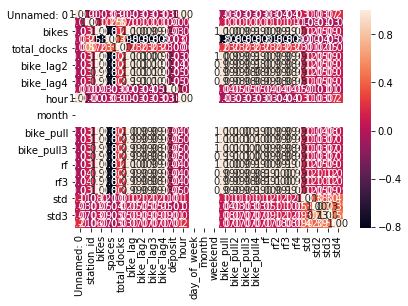

In [7]:
sns.heatmap(df.corr(), annot=True, fmt=".2f")

In [8]:
df.isnull().values.any()

False

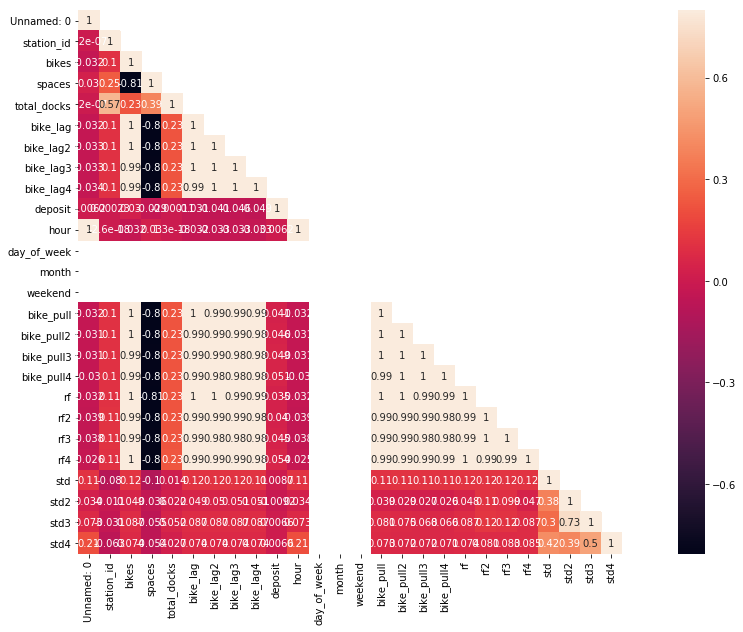

In [9]:
corrMatt = df.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

In [90]:
df.tail()

station_id  bikes  spaces  total_docks  bike_lag  \
timestamp                                                               
2018-02-08 23:50:00          21      4      26           30         4   
2018-02-08 23:50:00          93     39       0           40        39   
2018-02-08 23:50:00          99      0      30           30         0   
2018-02-08 23:50:00          40      2      19           21         2   
2018-02-08 23:50:00           8      0      30           30         0   

                     bike_lag2  bike_lag3  bike_lag4  deposit  hour  ...   \
timestamp                                                            ...    
2018-02-08 23:50:00          4          4          4        0    23  ...    
2018-02-08 23:50:00         39         39         39        0    23  ...    
2018-02-08 23:50:00          0          0          0        0    23  ...    
2018-02-08 23:50:00          2          2          2        0    23  ...    
2018-02-08 23:50:00          0          0          0        0    23  ...    

                     bike_pull3  bike_pull4     rf    rf2    rf3    rf4   std  \
timestamp                                                                       
2018-02-08 23:50:00           3           3   4.00   7.08   7.45   3.57  0.00   
2018-02-08 23:50:00          39          39  38.84  39.12  38.74  38.73  0.11   
2018-02-08 23:50:00           0           0   0.12   0.03   0.03   0.01  0.08   
2018-02-08 23:50:00           2           2   2.00   2.05   2.20   1.80  0.00   
2018-02-08 23:50:00           0           0   0.00   0.36   0.70   1.60  0.00   

                     std2  std3  std4  
timestamp                              
2018-02-08 23:50:00  2.18  3.14  0.41  
2018-02-08 23:50:00  0.08  0.18  0.19  
2018-02-08 23:50:00  0.02  0.02  0.01  
2018-02-08 23:50:00  0.04  0.14  0.14  
2018-02-08 23:50:00  0.25  0.49  1.13  

[5 rows x 25 columns]

In [84]:
dfPivot = pd.pivot_table(df, values = ["bikes"], 
                             columns = "day_of_week", index = "hour")

#dfPivot = pd.pivot_table(df, values = ["bikes","rf","rf2","rf3","rf4"], 
#                             columns = "day_of_week", index = "hour")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1118182e8>,
      dtype=object)

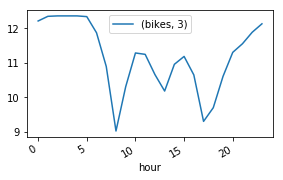

In [87]:
dfPivot.plot(subplots = True, figsize=(15, 15), layout=(5, 3), sharey=True)

In [32]:
dfPivot02 = pd.pivot_table(df, values = ["bikes","rf","rf2","rf3","rf4"], 
                             columns = ["day_of_week","station_id"], index = "hour")

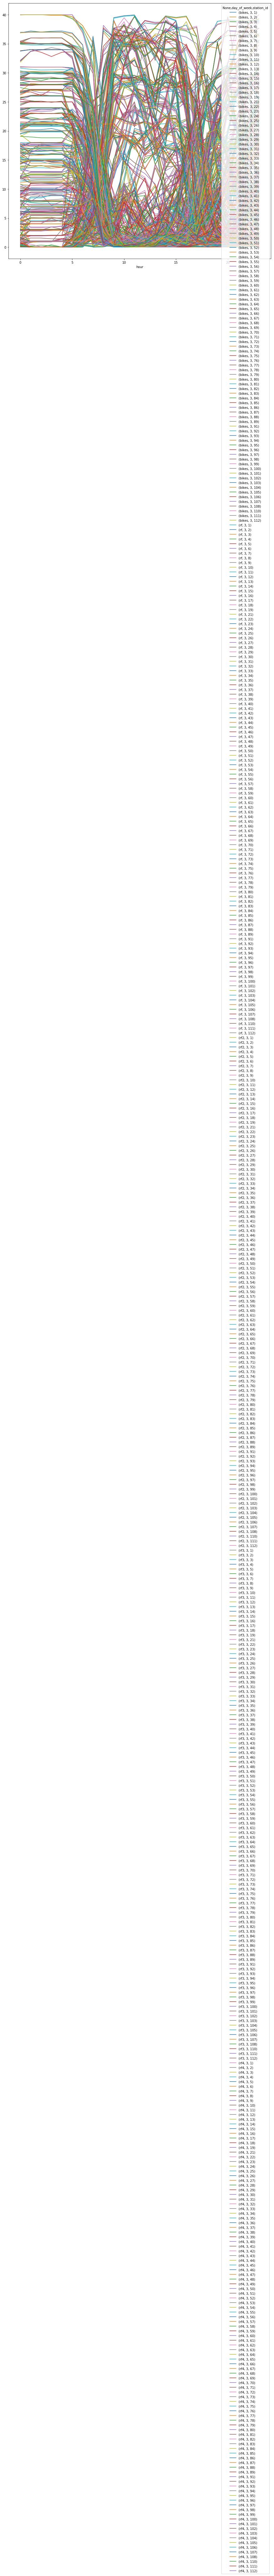

In [33]:
dfPivot02.plot(subplots = False, figsize=(15, 15), layout=(50, 3), sharey=True)

In [26]:
dfPivot = pd.pivot_table(df[df['station_id']==34], values = ["bikes","rf","rf2","rf3","rf4"], 
                             columns = "station_id", index = "hour")

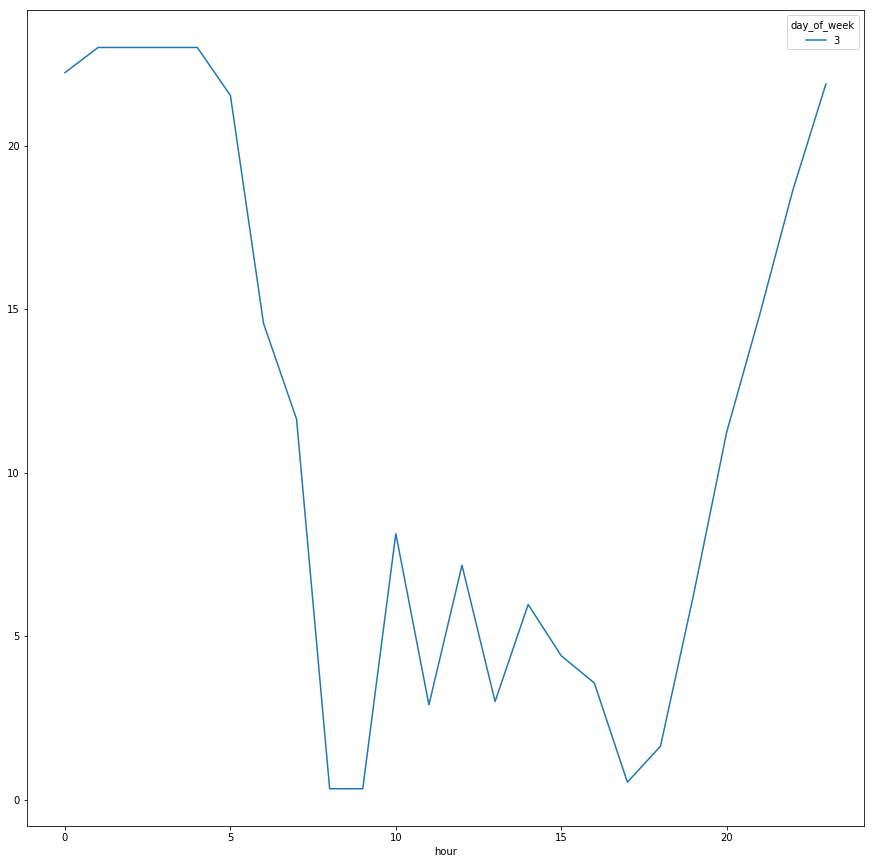

In [100]:
dfPivot.plot(subplots = False, figsize=(15, 15))

In [44]:
dfPivotStationSum = pd.pivot_table(df, values = "bikes", 
                             columns = "station_id", index = "day_of_week")

[Text(0,0.5,'bikes'),
 Text(0.5,0,'Bikes deposited'),
 Text(0.5,1,'count by bikes deposited')]

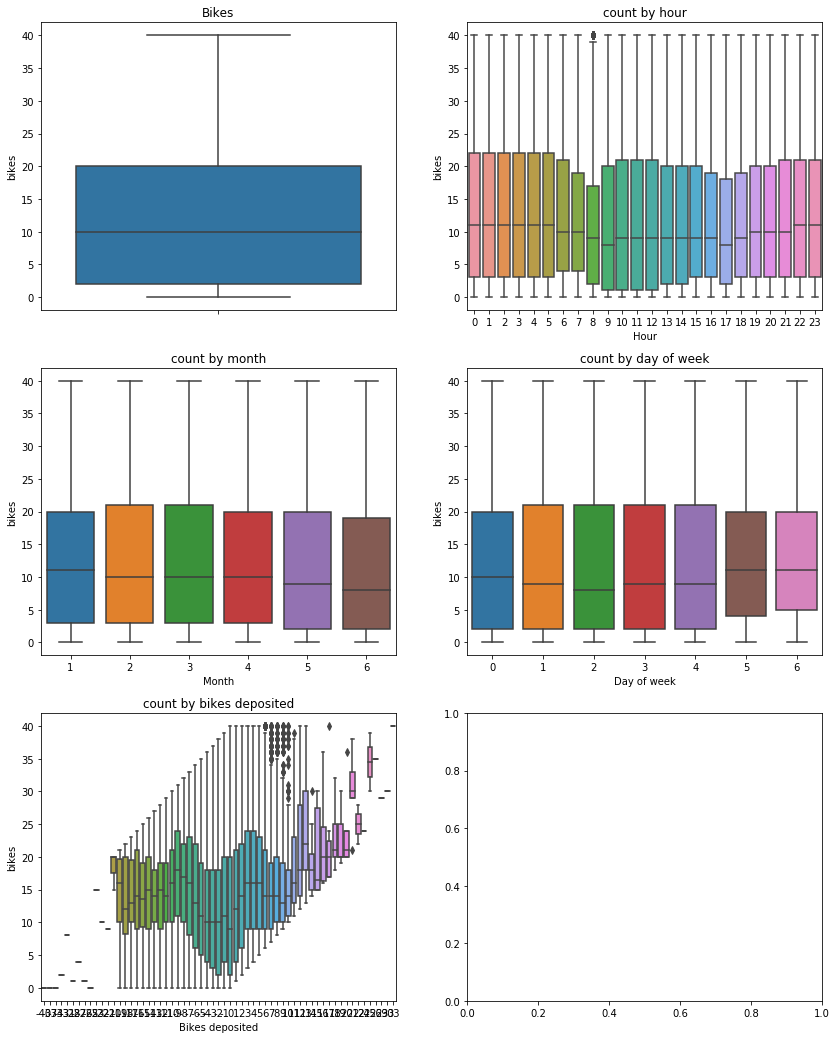

In [24]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(14, 18)
sns.boxplot(data=df, y="bikes", orient="v", ax=axes[0][0])
sns.boxplot(data=df, y="bikes", x="hour", orient="v", ax=axes[0][1])
sns.boxplot(data=df, y="bikes", x="month", orient="v", ax=axes[1][0])
sns.boxplot(data=df, y="bikes", x="day_of_week", orient="v", ax=axes[1][1])
sns.boxplot(data=df, y="bikes", x="deposit", orient="v", ax=axes[2][0])



axes[0][0].set(ylabel="bikes", title="Bikes")
axes[0][1].set(xlabel="Hour", ylabel="bikes", title="count by hour")
axes[1][0].set(xlabel="Month", ylabel="bikes", title="count by month")
axes[1][1].set(xlabel="Day of week", ylabel="bikes", title="count by day of week")
axes[2][0].set(xlabel="Bikes deposited", ylabel="bikes", title="count by bikes deposited")

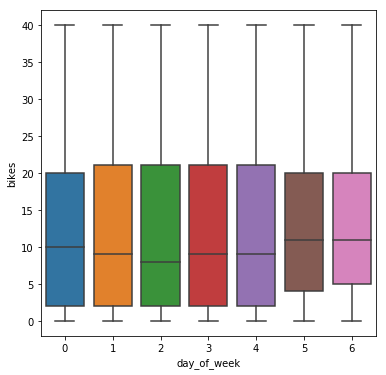

In [25]:

fig, ax = plt.subplots()
fig.set_size_inches(6, 6)
ax = sns.boxplot(data=df, y="bikes", x="day_of_week")

In [7]:
df.columns

Index(['station_id', 'bikes', 'spaces', 'total_docks', 'bike_lag', 'bike_lag2',
       'bike_lag3', 'bike_lag4', 'deposit', 'hour', 'day_of_week', 'month',
       'weekend', 'bike_pull4'],
      dtype='object')

In [12]:
dfPivot = pd.pivot_table(df[df['station_id'] == 34], values = "bikes", 
                             columns = ["day_of_week"], index = "hour")

In [13]:
dfPivot.head(2)

day_of_week          0          1          2          3          4          5  \
hour                                                                            
0            25.019093  24.480097  22.693270  23.298607  23.696364  21.167879   
1            25.660000  24.867621  22.972007  23.781325  24.336970  22.231937   

day_of_week         6  
hour                   
0            18.59828  
1            19.91829

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1ac6a2b240>,
      dtype=object)

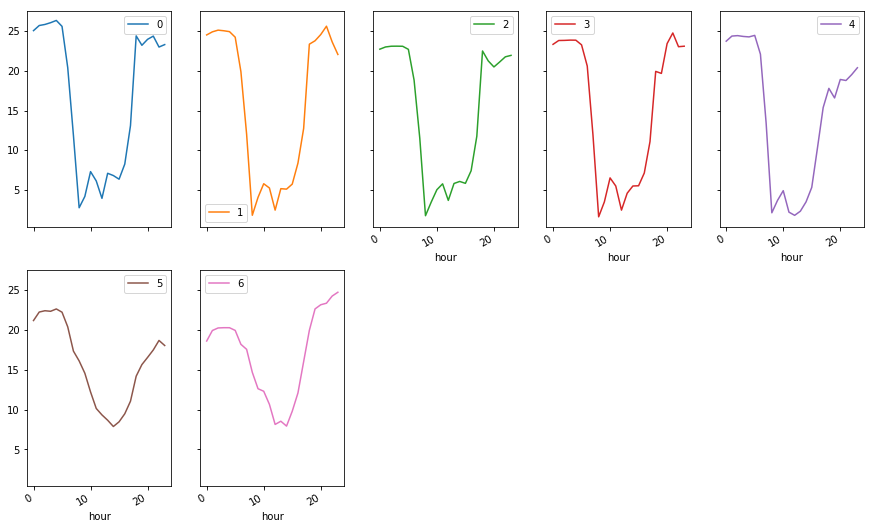

In [14]:
dfPivot.plot(subplots = True, figsize=(15, 15), layout=(3, 5), sharey=True)

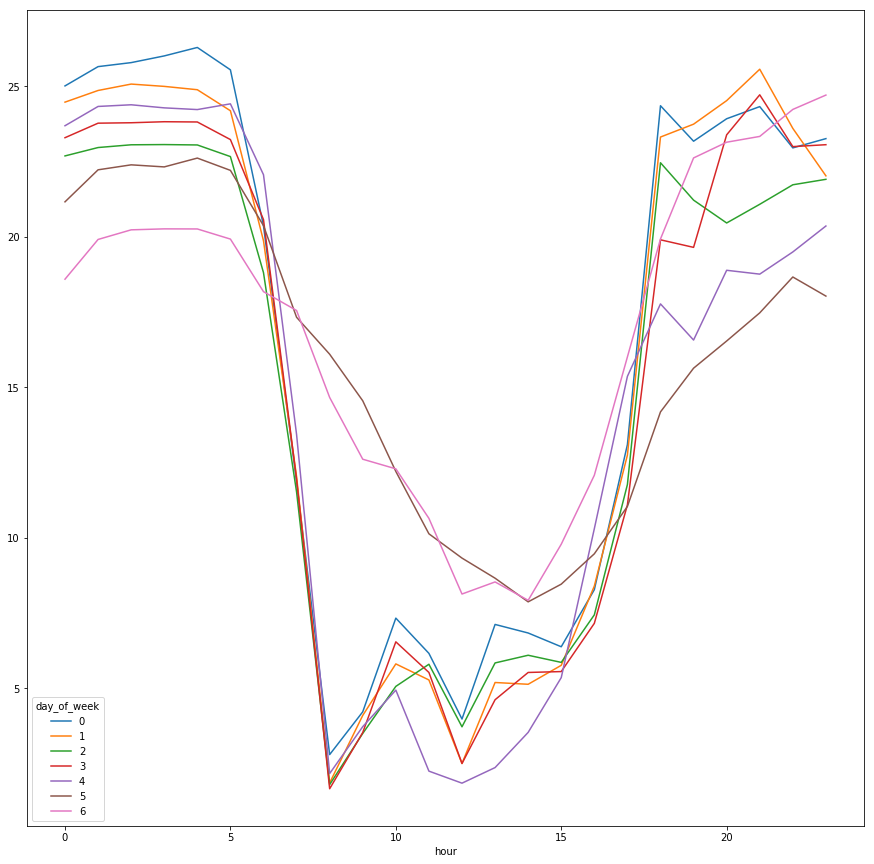

In [15]:
dfPivot.plot(subplots = False, figsize=(15, 15), layout=(3, 5), sharey=True)

no station


/Users/neil/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


no station
no station


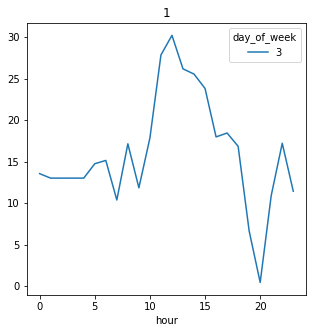

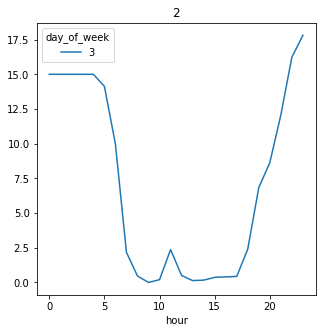

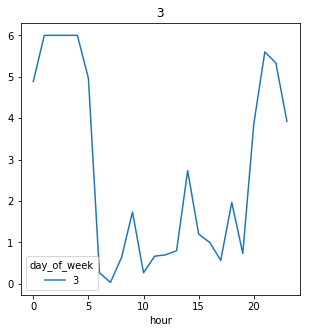

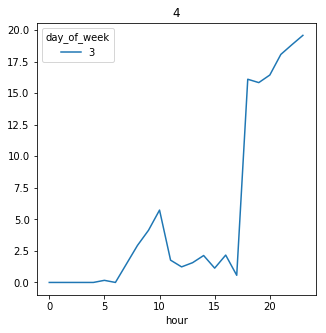

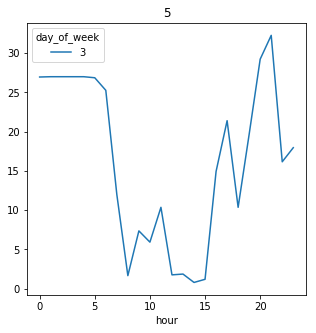

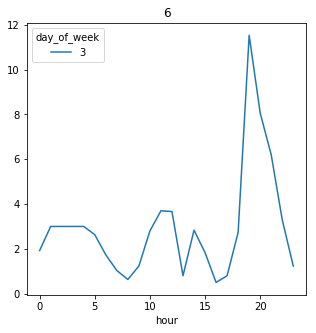

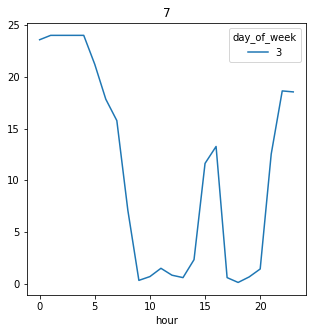

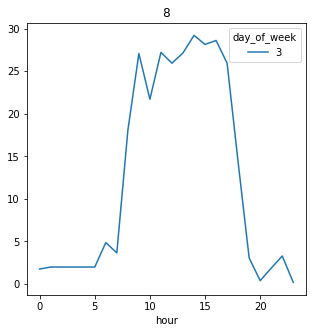

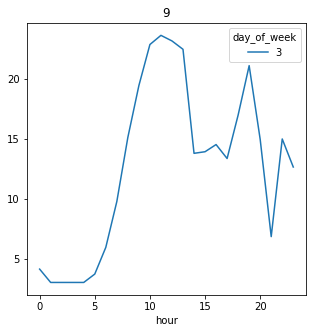

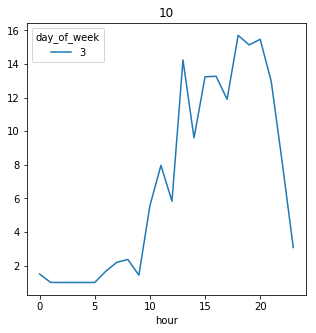

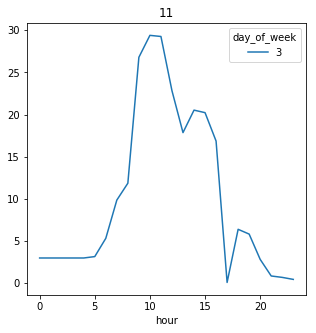

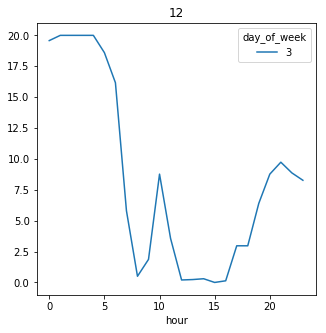

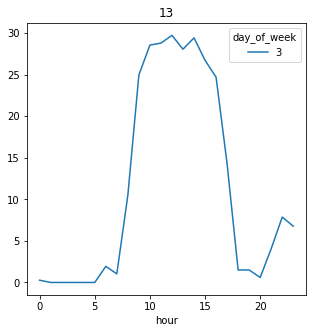

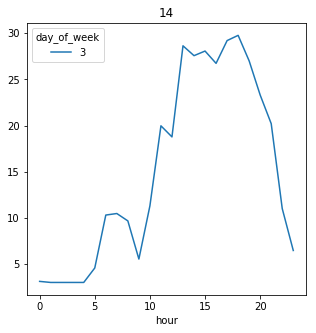

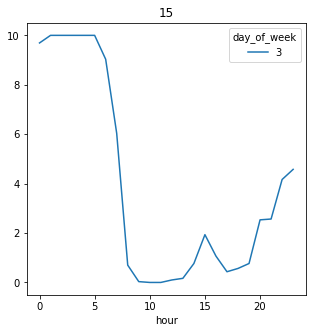

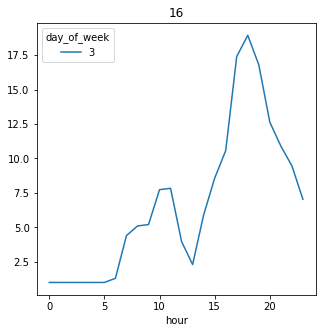

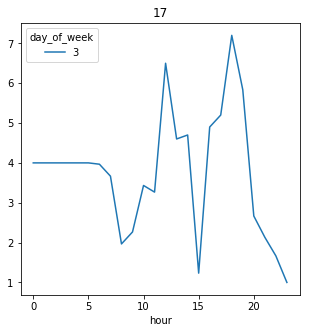

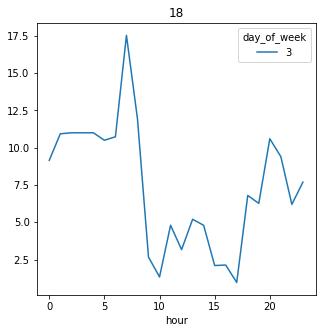

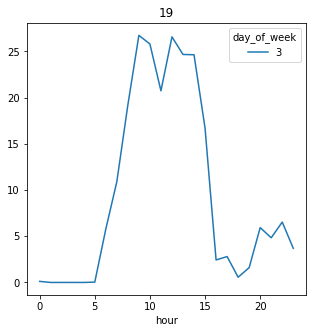

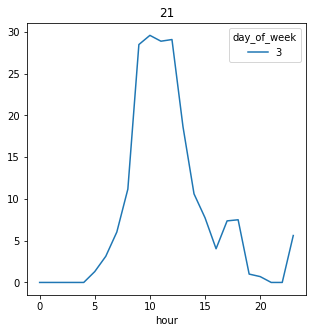

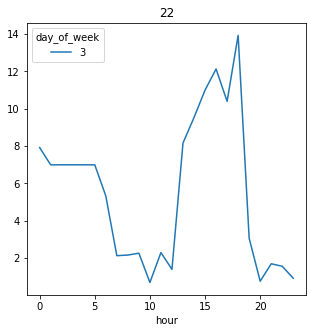

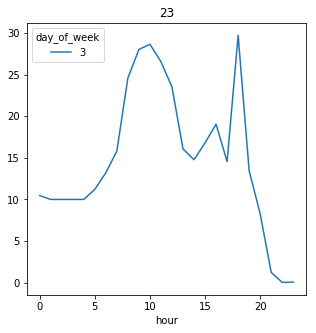

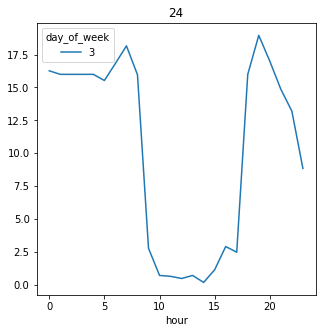

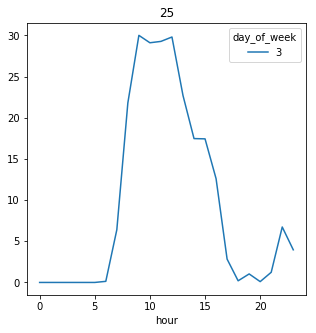

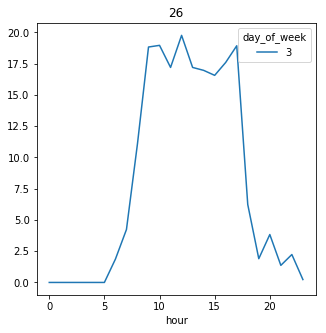

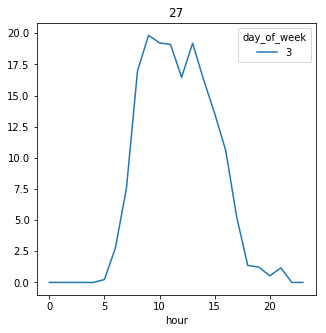

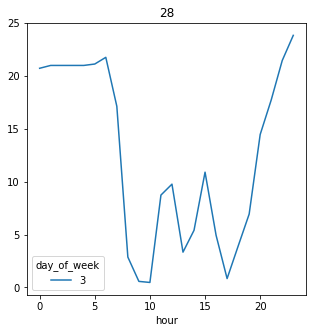

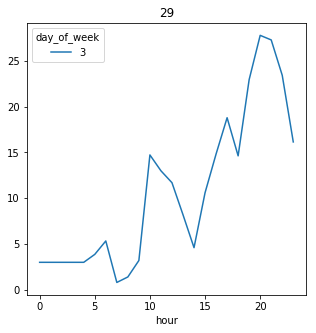

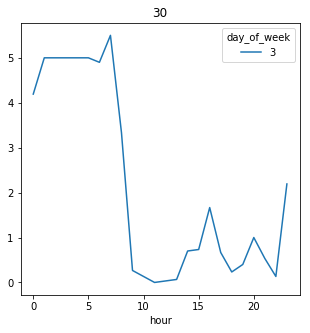

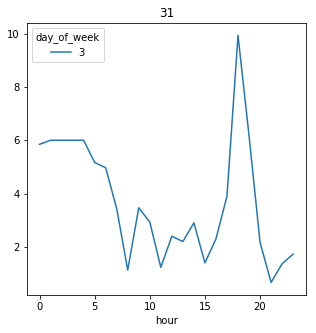

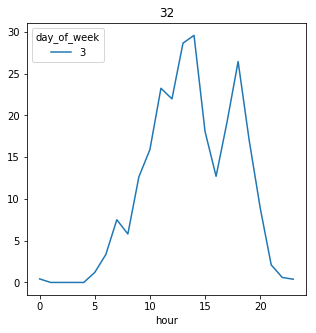

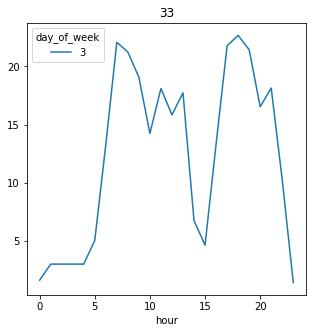

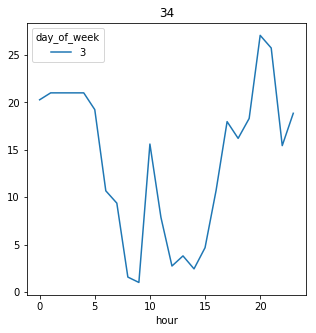

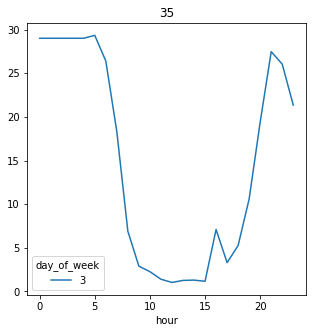

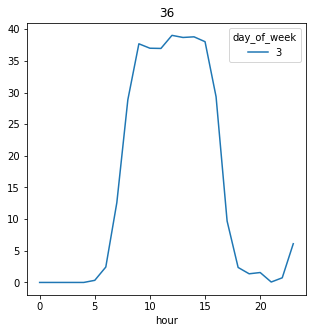

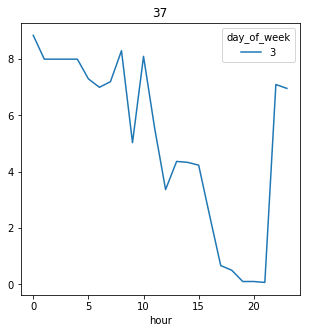

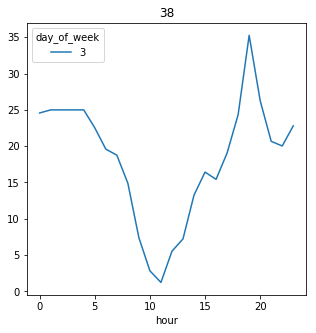

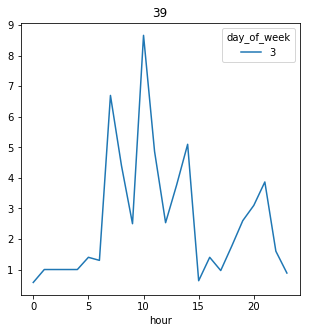

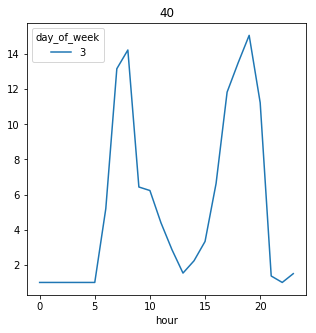

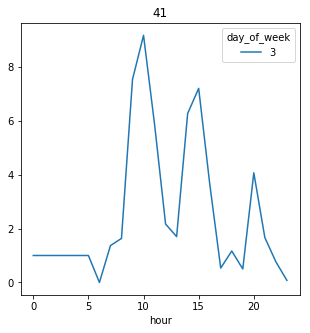

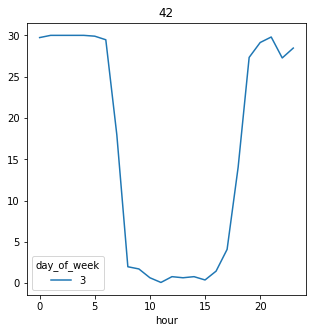

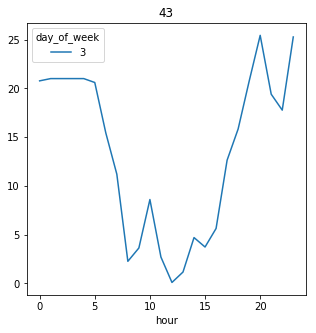

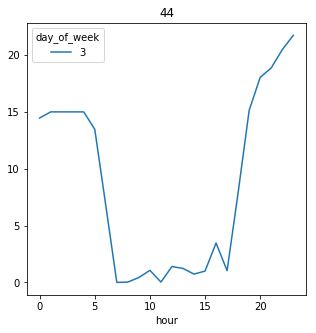

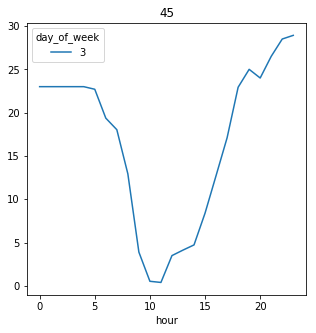

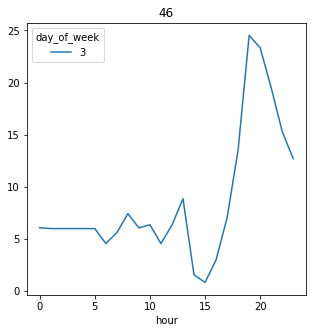

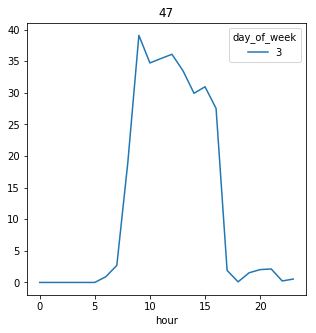

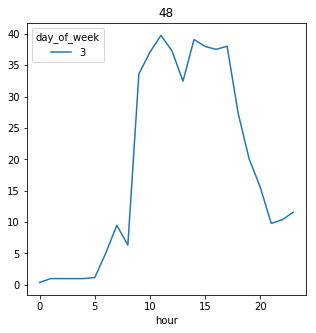

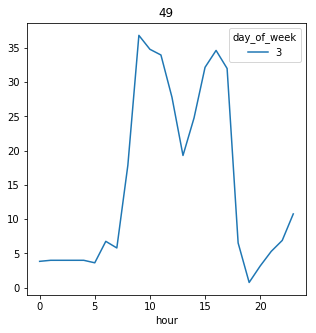

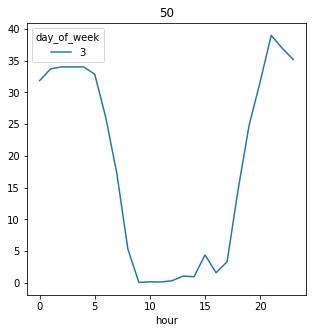

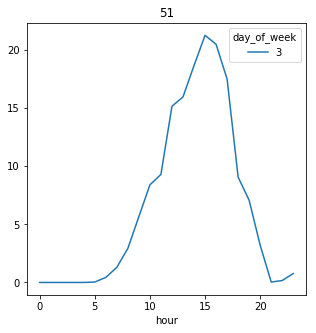

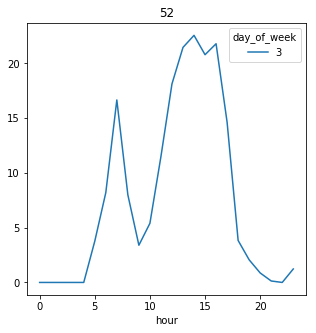

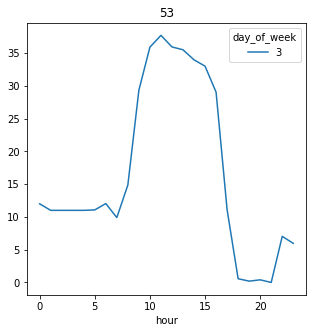

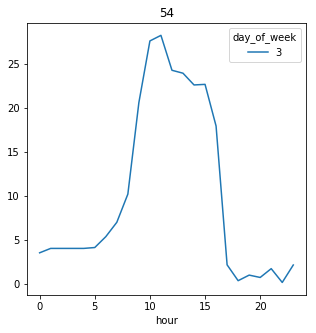

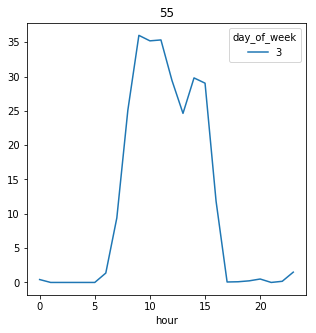

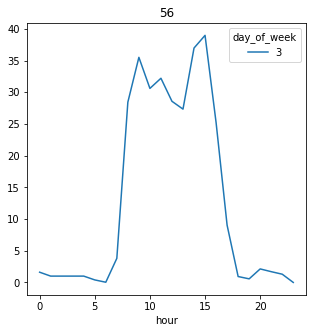

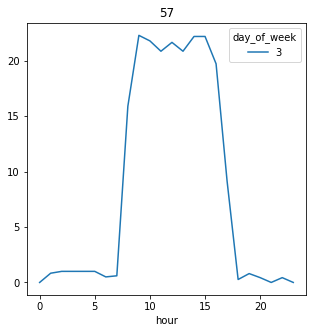

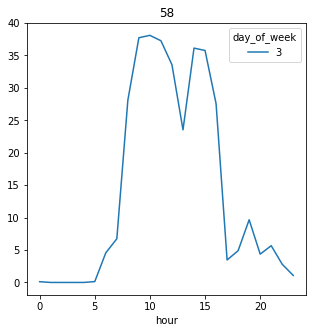

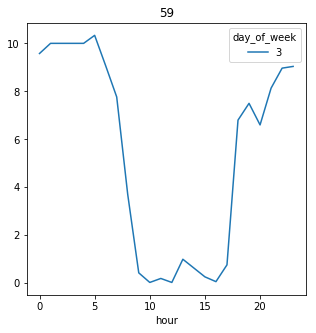

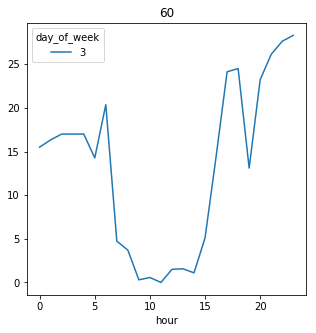

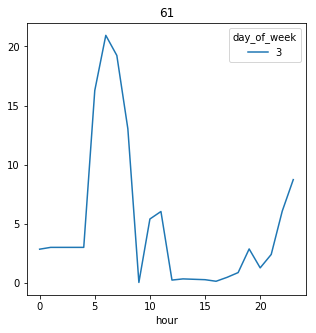

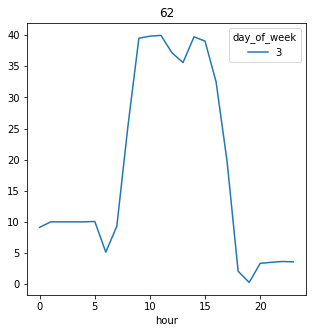

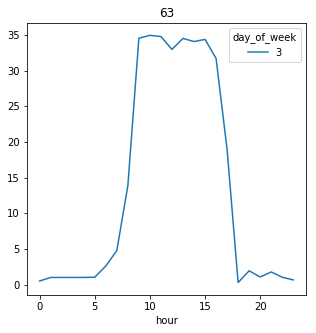

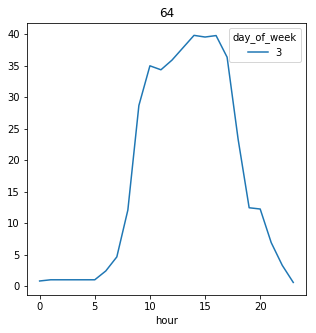

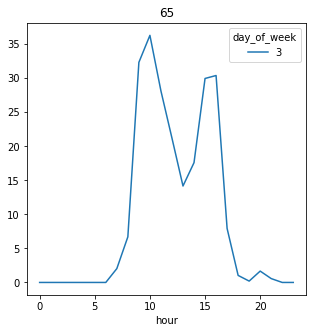

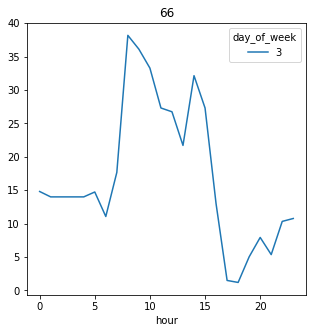

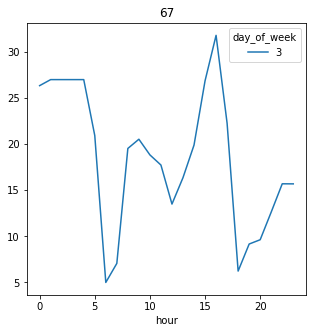

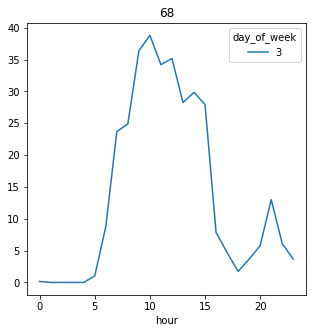

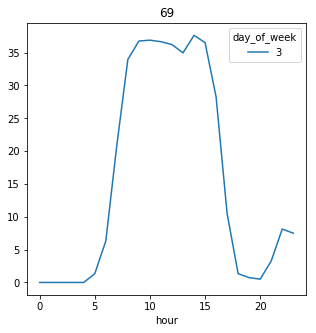

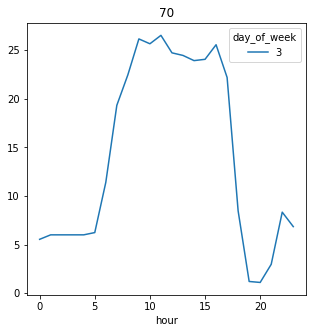

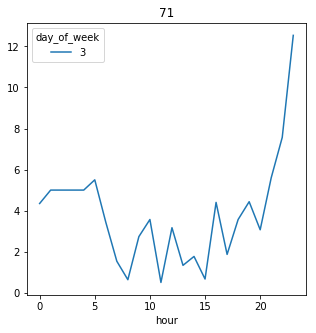

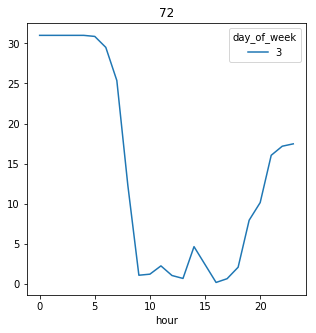

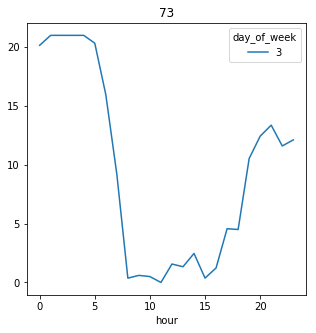

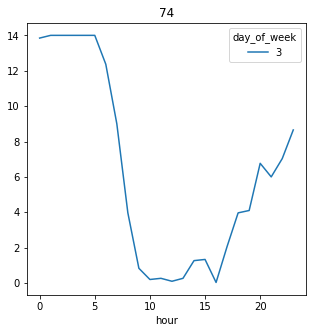

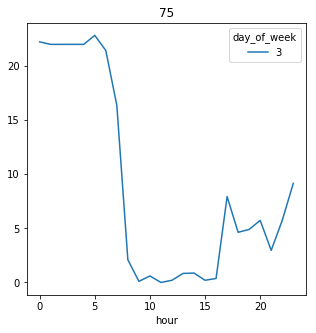

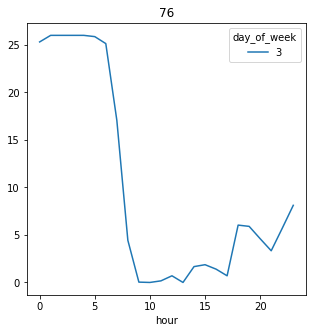

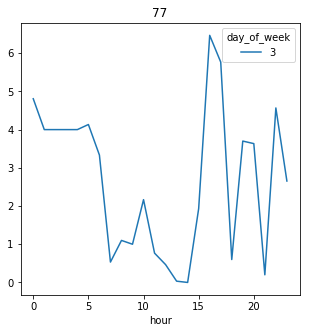

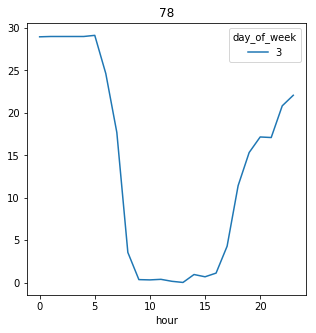

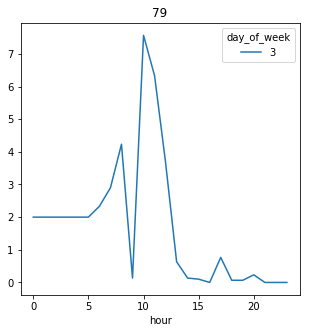

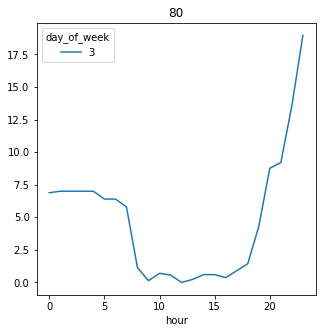

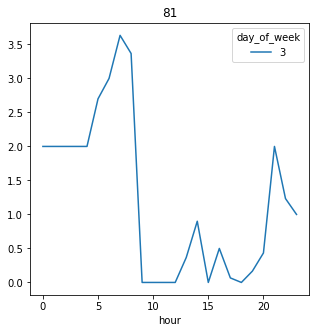

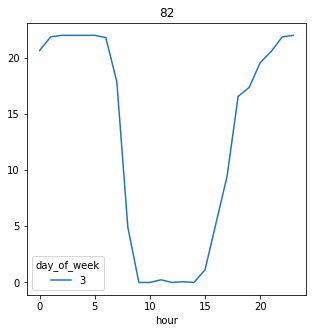

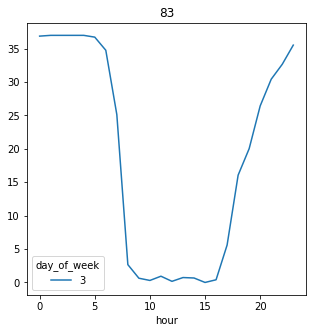

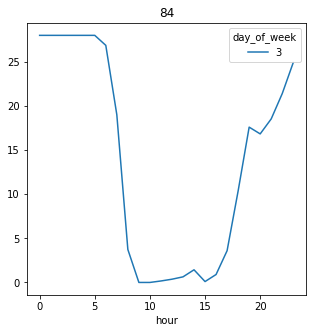

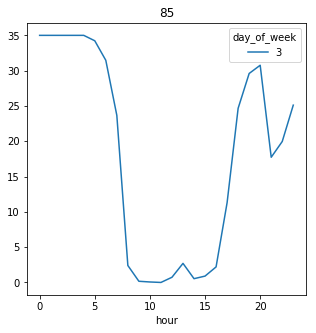

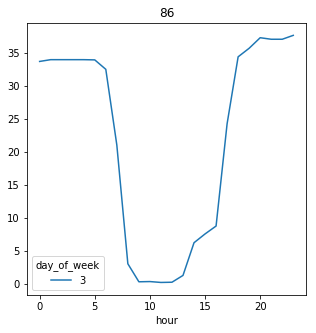

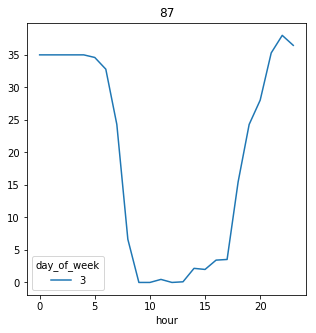

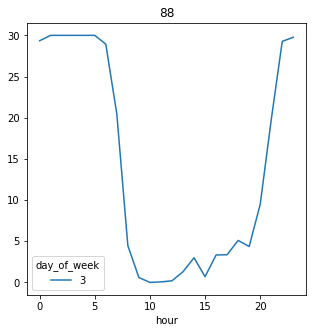

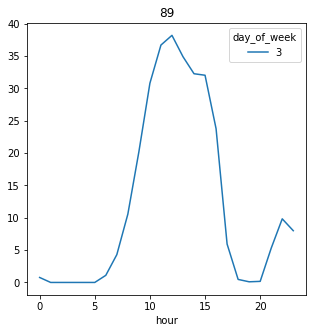

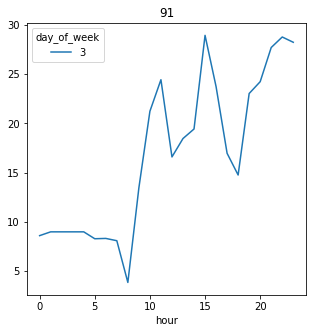

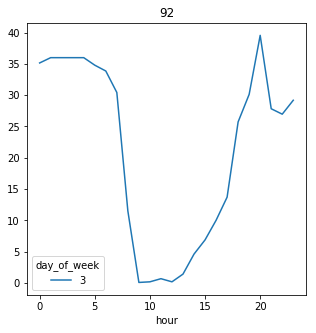

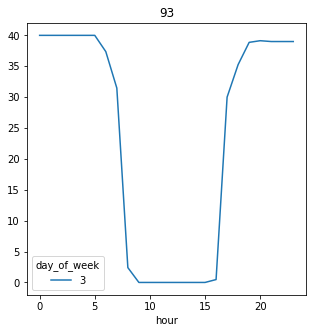

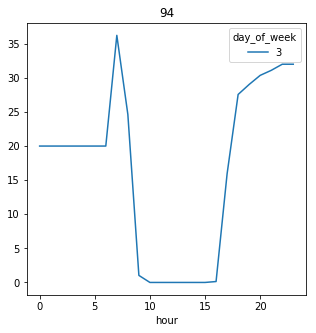

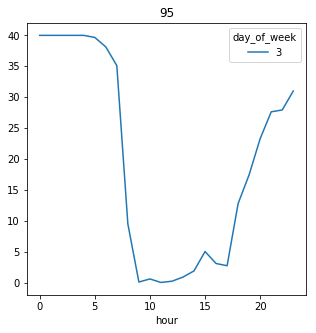

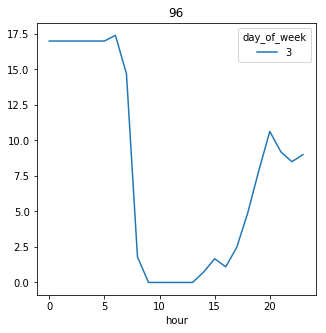

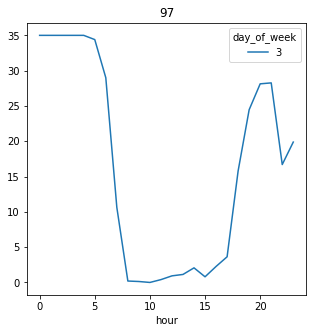

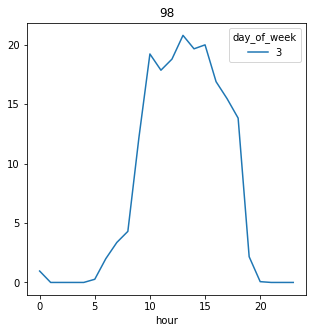

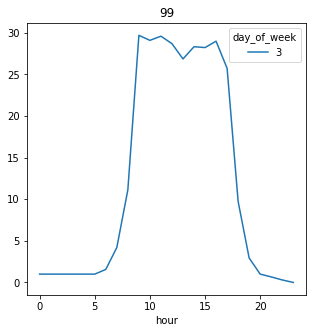

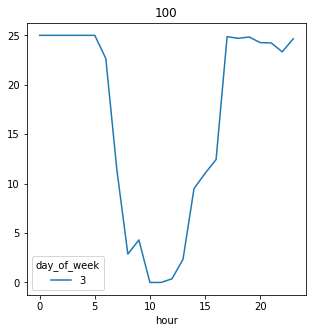

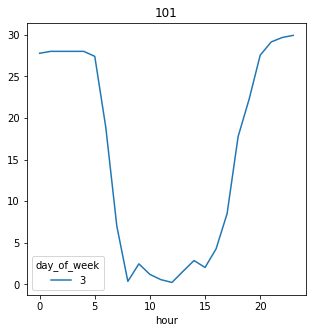

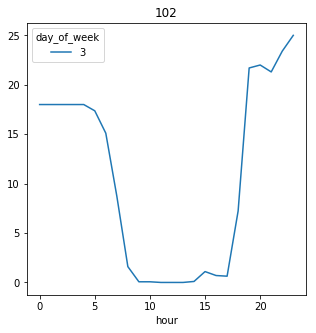

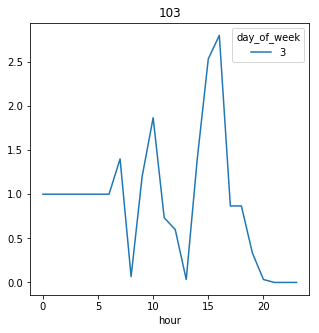

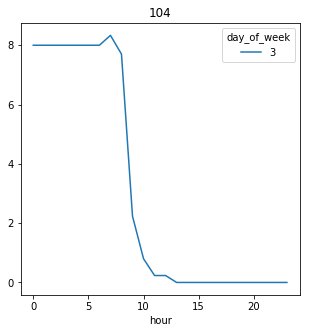

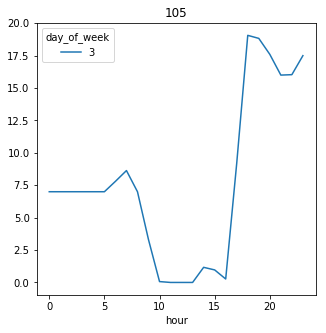

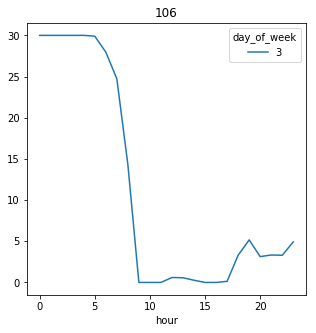

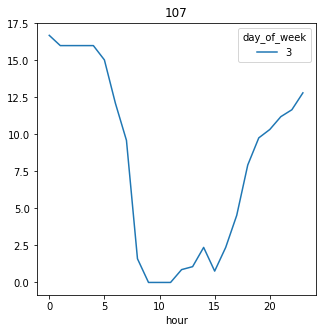

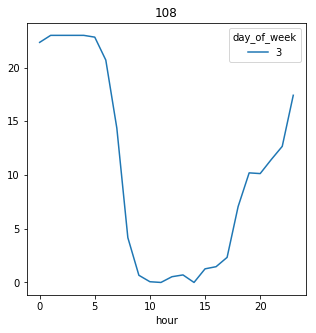

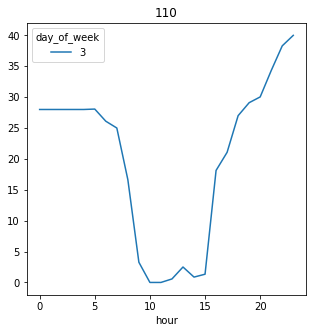

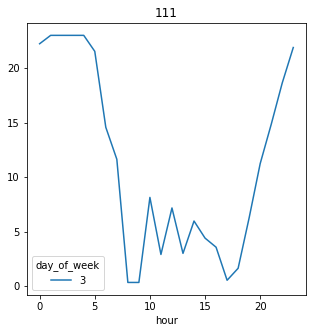

In [92]:
for i in range(1,112):
    try:
        dfPivot = pd.pivot_table(df[df['station_id'] == i], values = "bikes", 
                                 columns = ["day_of_week"], index = "hour")
        dfPivot.plot(subplots = False, figsize=(5, 5), layout=(3, 5), sharey=True, title=i)
    except:
        print('no station')

In [107]:


pivot_mean_hour = pd.read_csv('pivot_mean_hour.csv')



In [109]:
pivot_mean_hour['1']

0      4.704014
1      4.509091
2      4.502424
3      4.490909
4      4.504559
5      5.654321
6     10.361818
7     16.283374
8     21.582572
9     22.192121
10    22.398788
11    23.055758
12    23.776970
13    23.630909
14    20.117576
15    19.100606
16    15.907823
17    12.419394
18     7.658182
19     4.889563
20     4.039780
21     3.128424
22     3.874691
23     3.300788
Name: 1, dtype: float64

/Users/neil/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


no station
no stations
no station
no stations
no station
no stations
no station
no stations
no station
no stations
no station
no stations
no station
no stations
no station
no stations


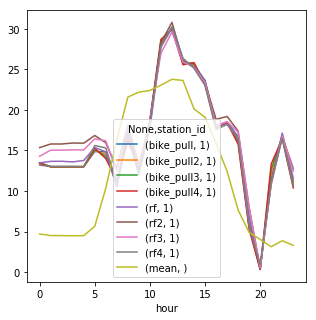

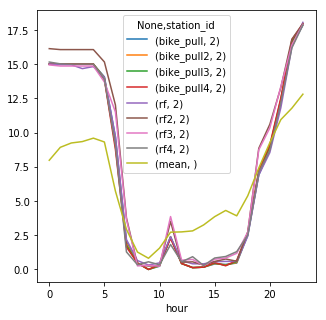

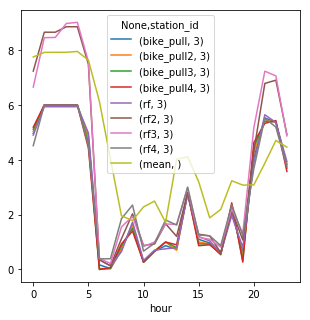

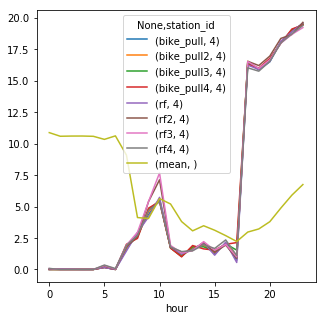

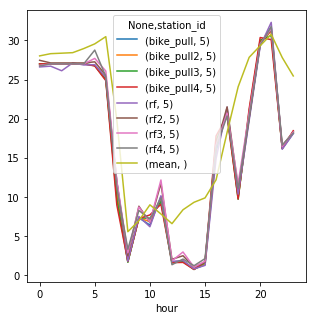

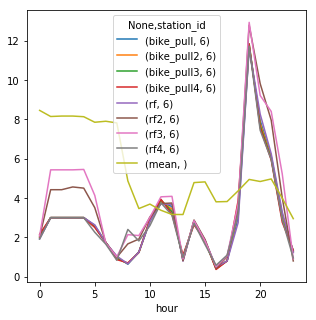

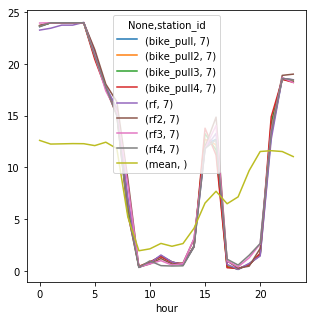

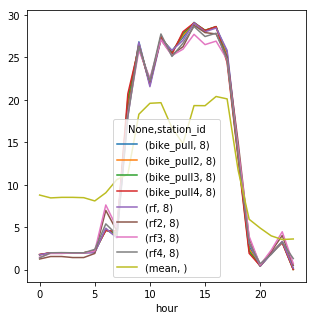

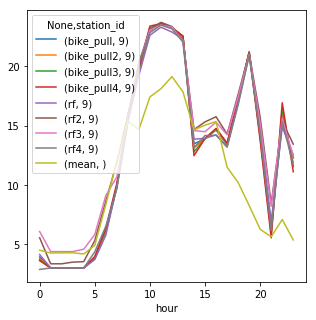

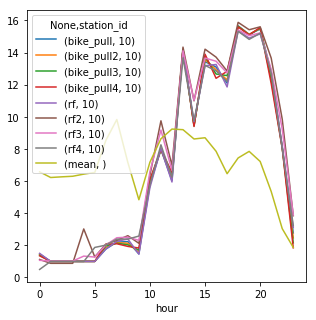

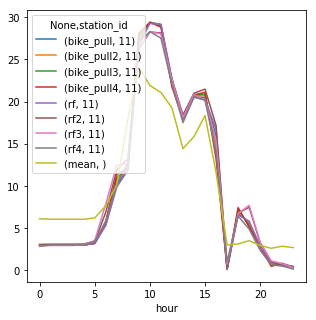

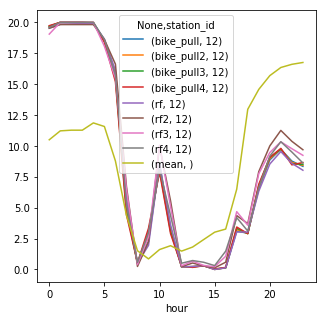

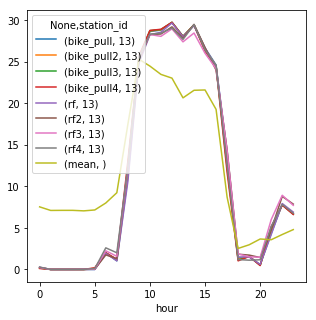

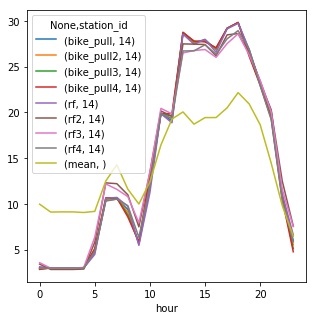

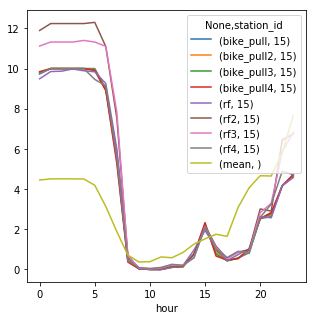

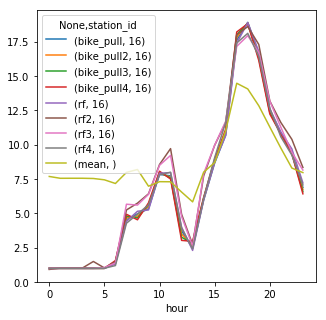

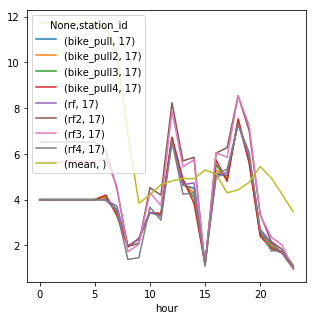

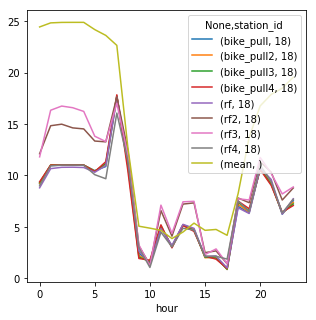

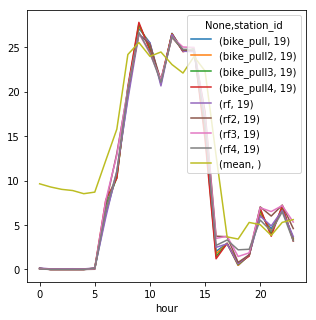

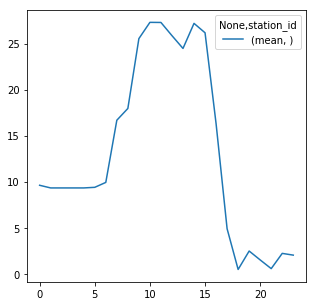

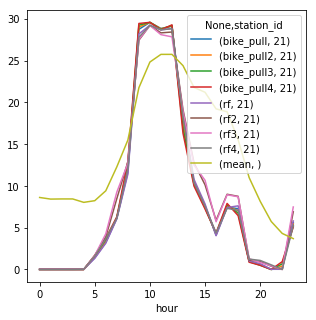

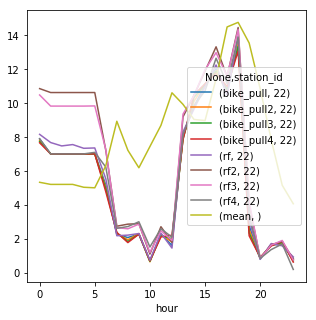

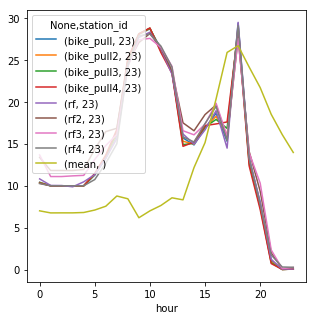

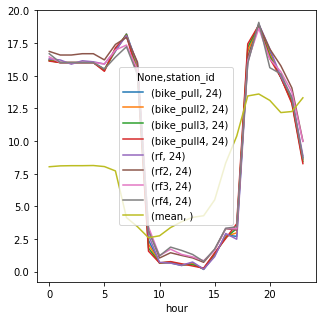

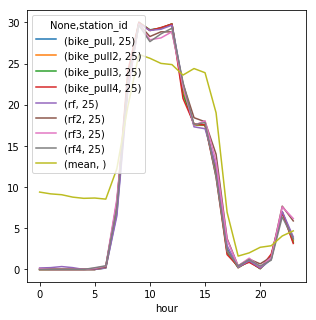

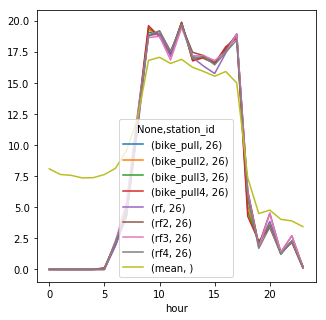

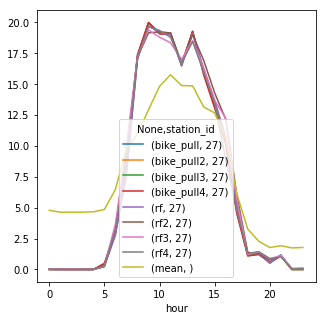

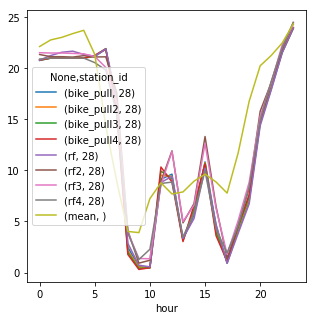

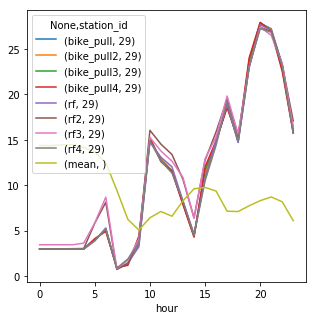

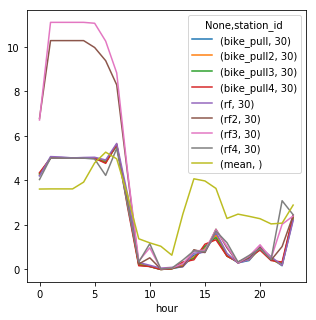

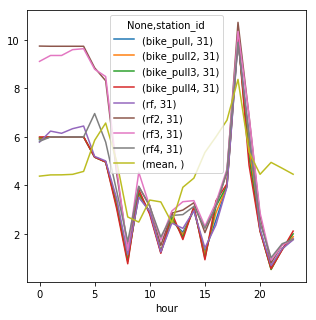

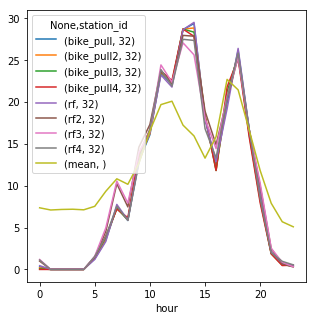

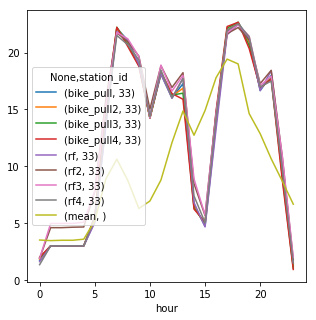

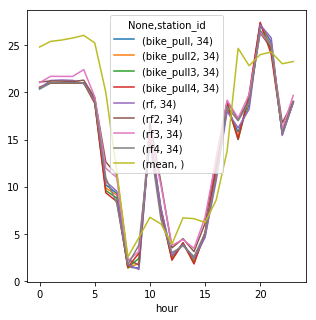

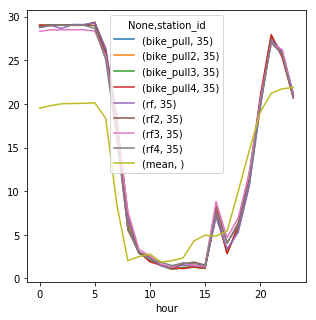

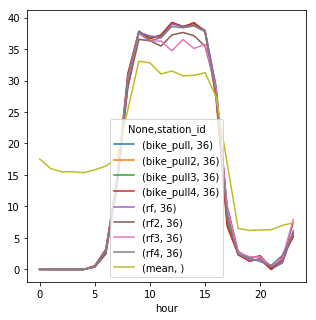

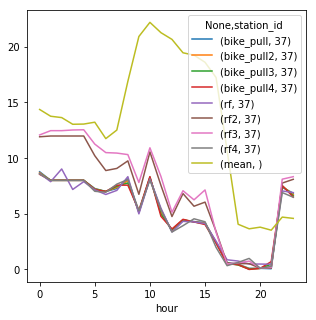

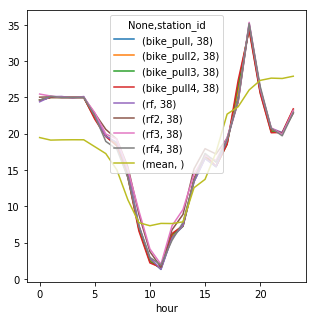

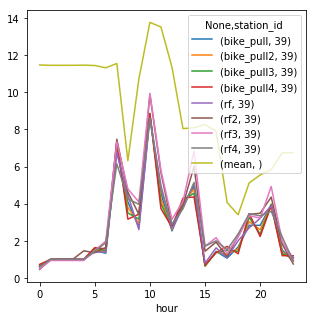

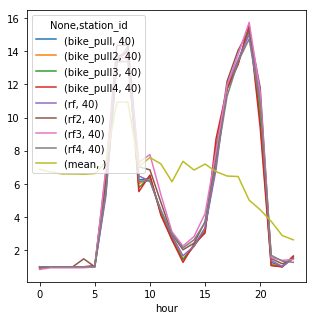

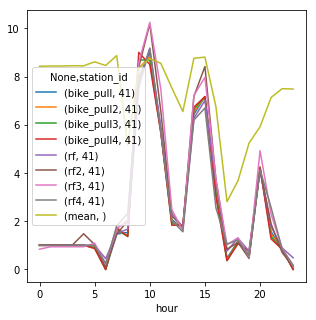

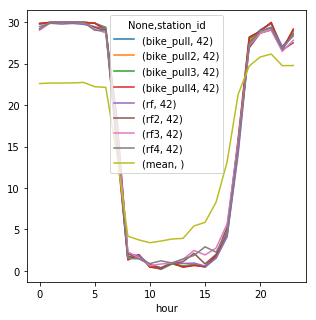

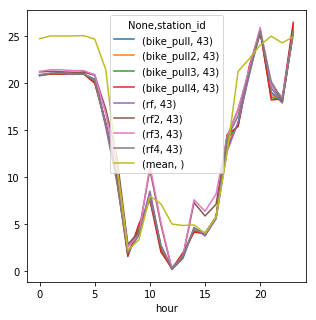

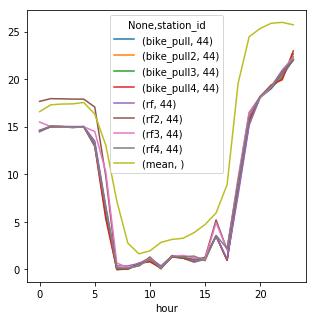

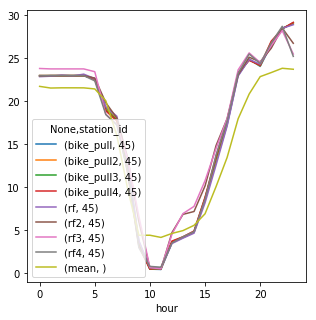

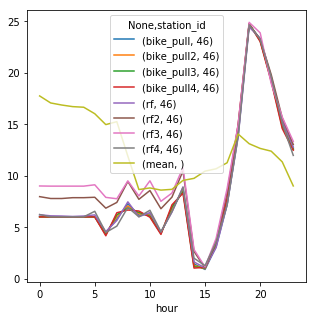

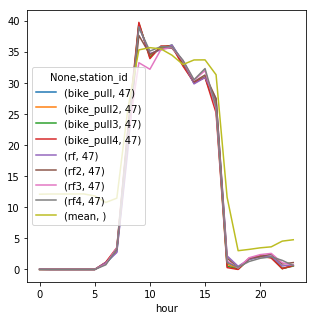

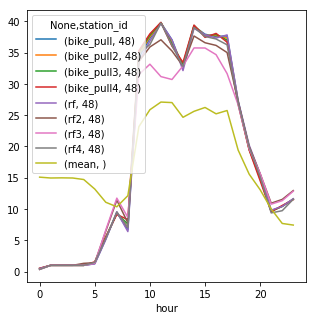

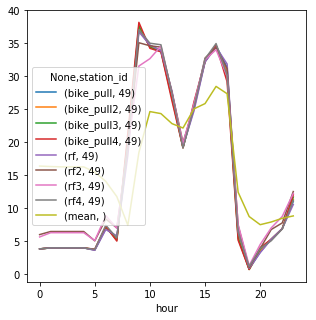

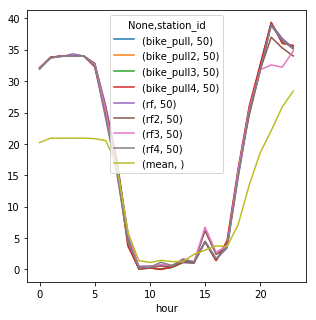

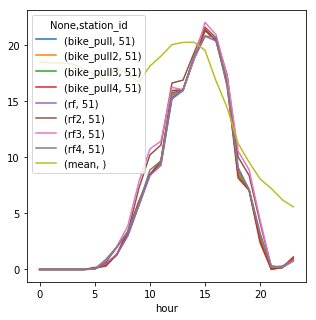

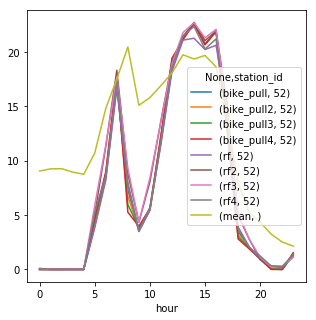

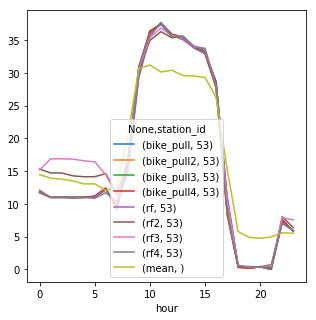

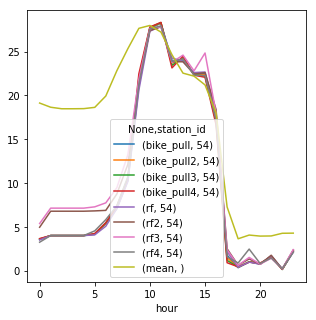

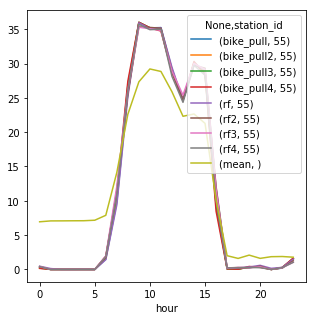

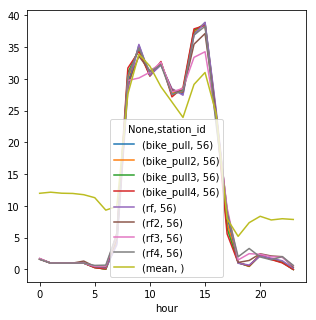

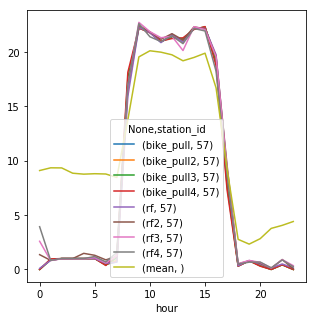

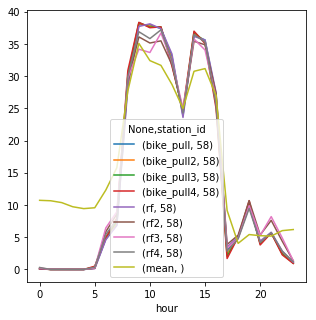

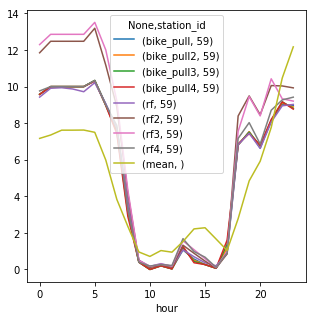

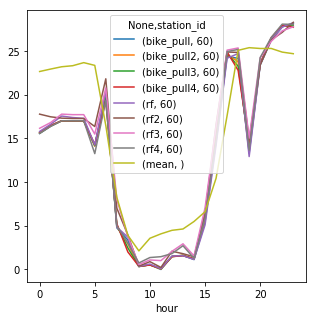

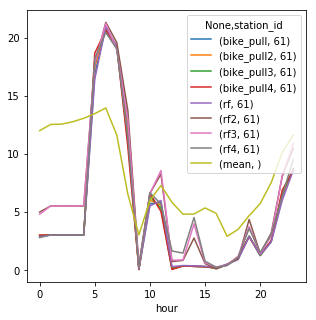

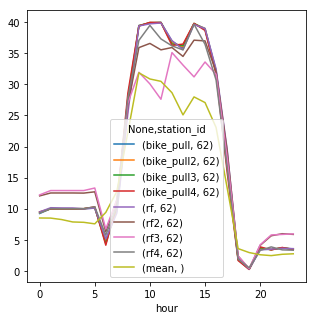

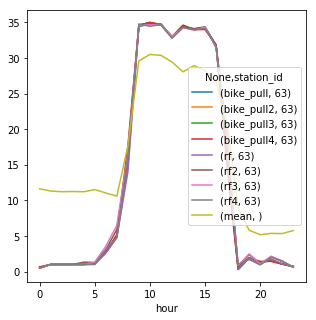

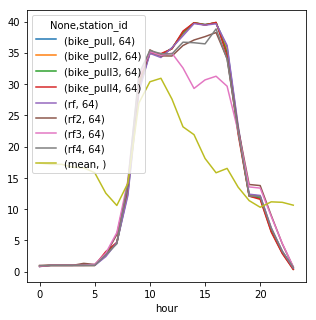

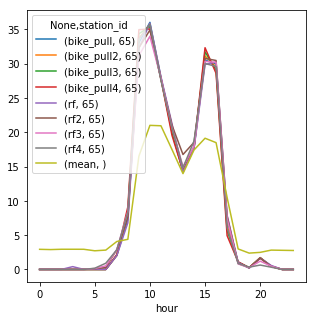

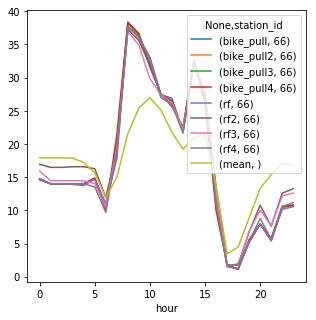

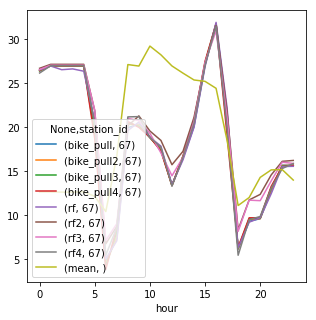

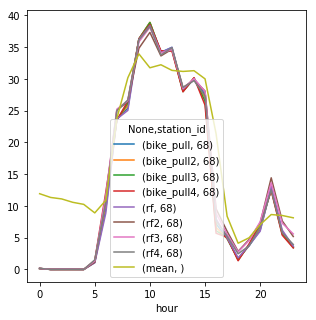

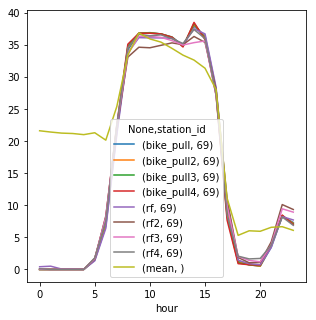

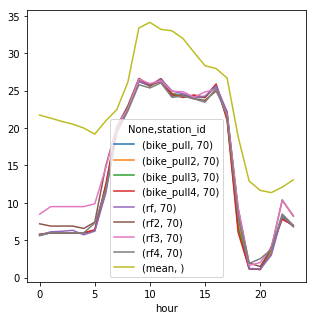

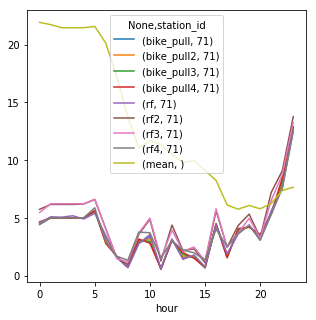

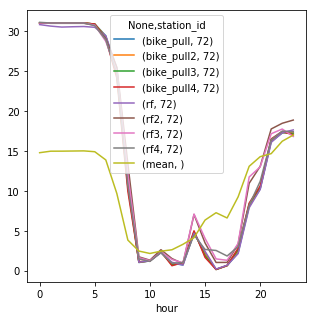

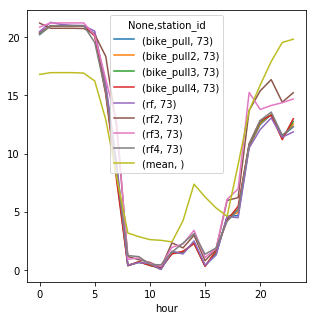

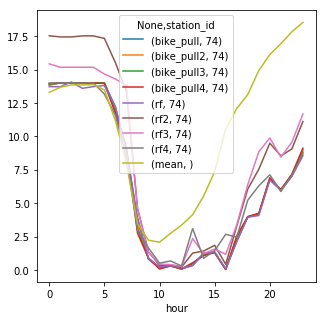

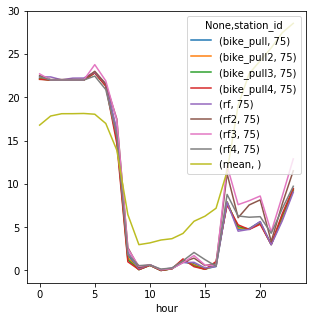

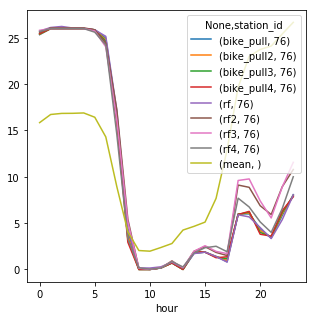

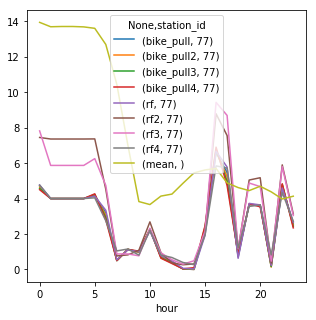

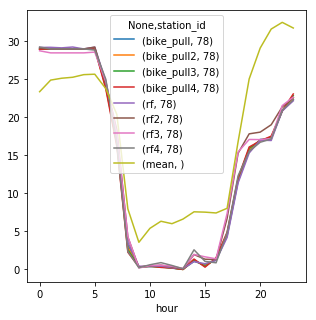

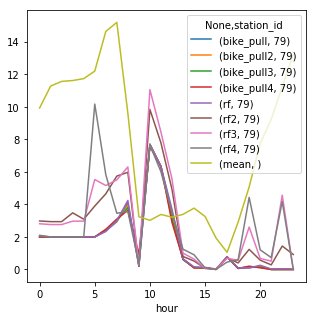

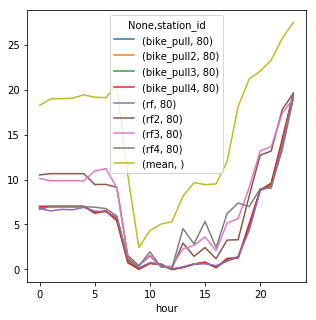

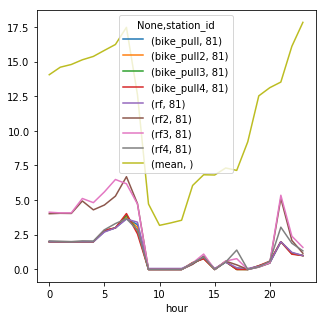

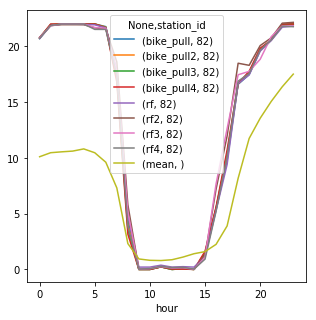

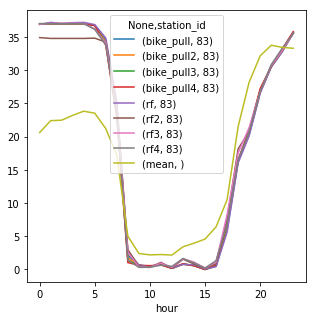

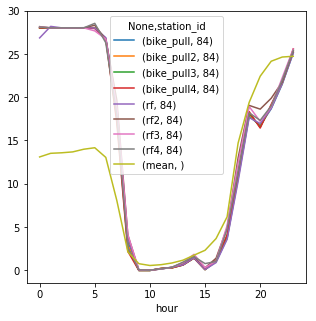

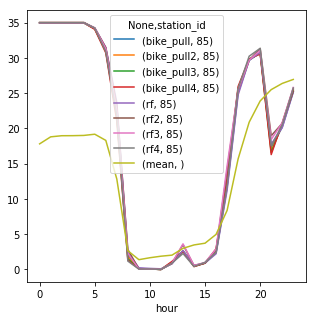

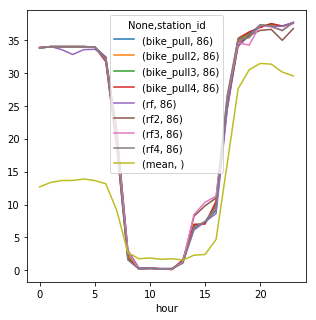

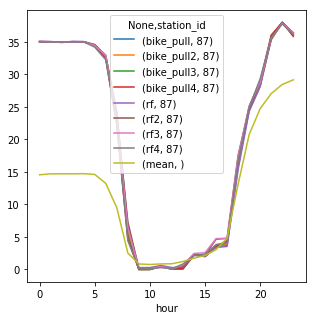

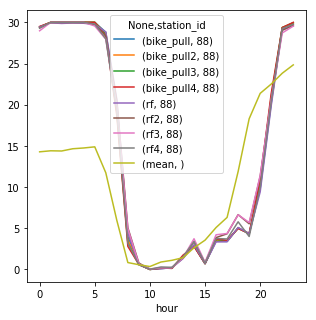

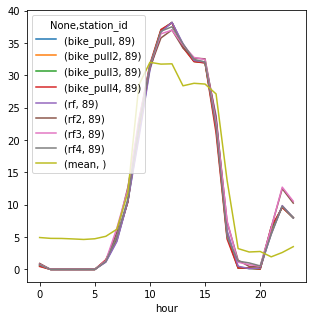

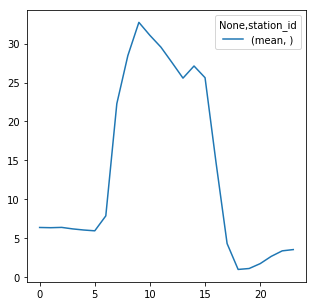

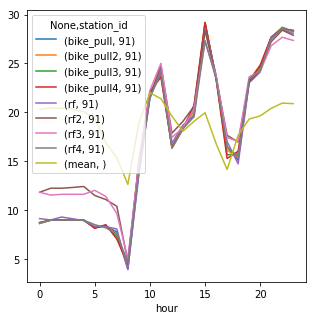

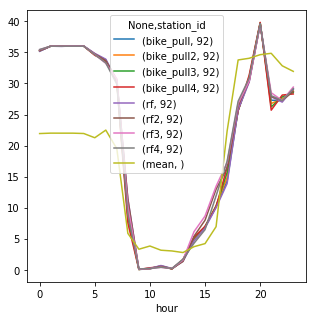

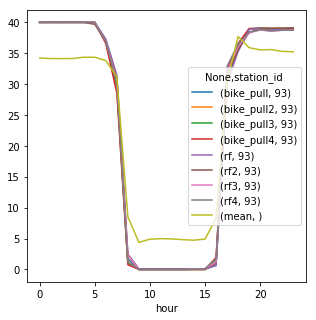

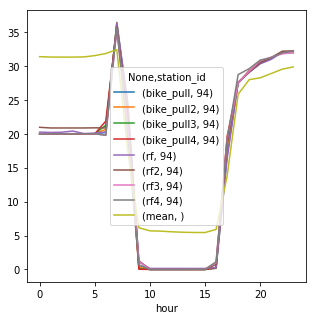

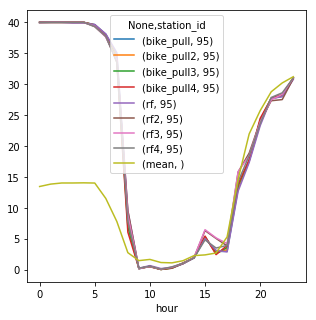

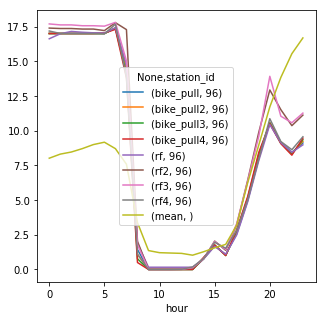

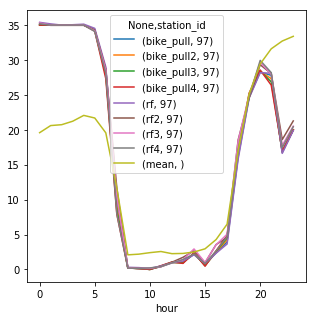

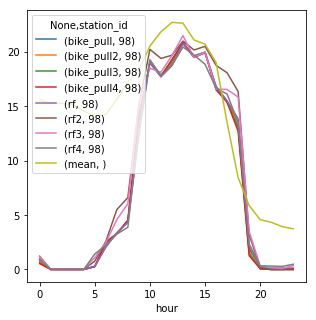

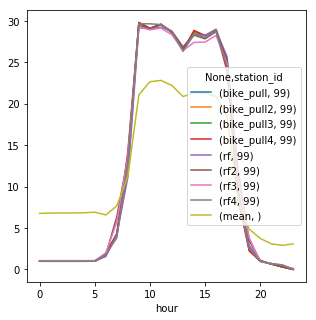

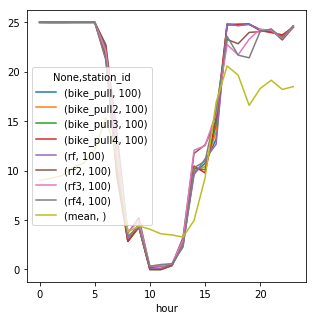

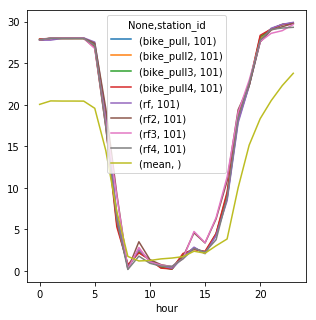

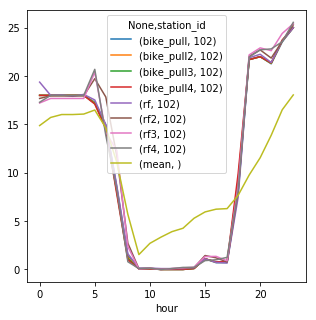

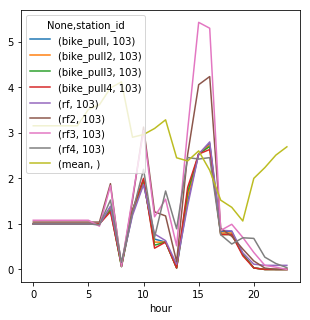

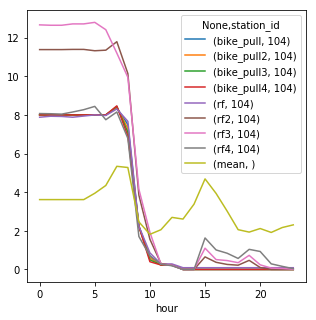

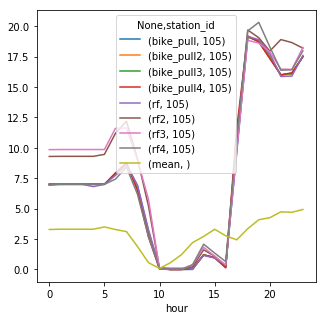

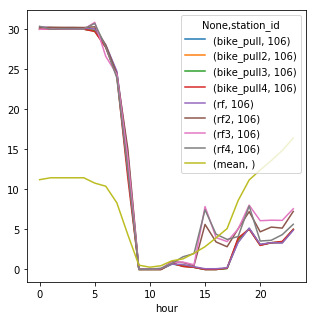

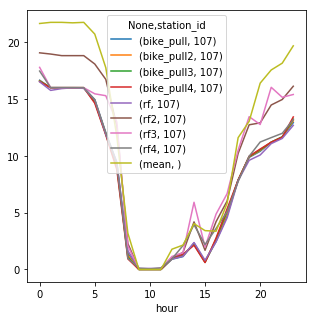

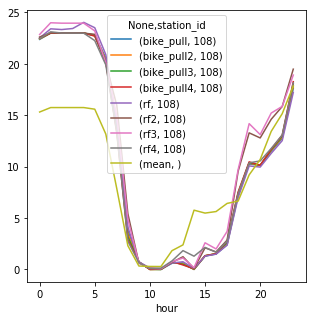

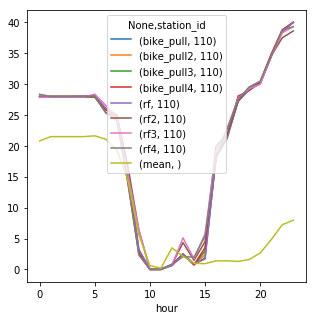

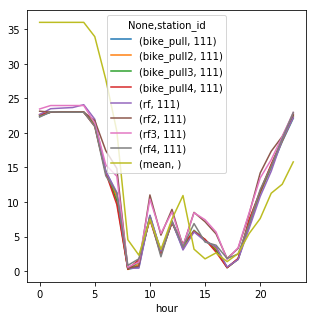

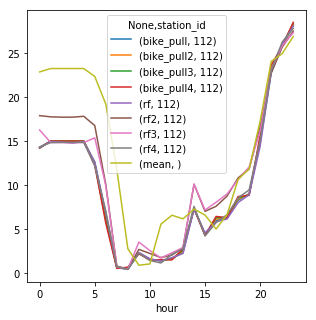

In [114]:
for i in range(1,120):
    try:

        dfPivot = pd.pivot_table(df[df['station_id']==i], values = ["bike_pull","bike_pull2","bike_pull3","bike_pull4","rf","rf2","rf3","rf4"], 
                            columns = "station_id",  index = "hour")
        dfPivot['mean'] = pivot_mean_hour[str(i)]
        dfPivot.plot(subplots = False, figsize=(5, 5), layout=(3, 5), sharey=True)
    except:
        print('no station')
    try:
        dfPivot = dfPivot.drop('mean',axis=1)
    except:
        print("no stations")

In [52]:
dfPivotMinute = pd.pivot_table(df, values = "bikes", 
                             columns = ["day_of_week"], index = "hour")

In [40]:
dfPivotMinute = pd.pivot_table(df[df['station_id'] == 34], values = "bikes", 
                             columns = ["day_of_week"], index = "hour")

AttributeError: Unknown property harex

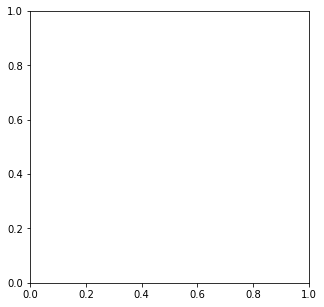

In [42]:
dfPivotMinute.plot(subplots = True, figsize=(5, 5), harex='col', sharey='row')


In [60]:
df = df.drop('Unnamed: 0', axis=1)

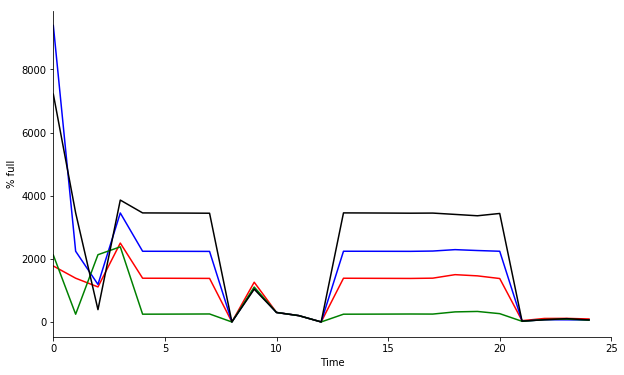

ValueError: Incorrect number of features. Got 77608 features, expected 25

In [71]:
# Now we'll do the kmeans clustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
import seaborn as sns

n_clusters = 8


fig, ax = plt.subplots(figsize=(10,6))
colours = ['red','blue','green','black']



# Fit kmeans model and plot the centroids
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(df)
for k, colour in zip(kmeans.cluster_centers_, colours):
    plt.plot(100*k,color=colour,label=colour)
  
  
ax.set_xlim([0,23])
xticks = ax.get_xticks()
plt.xticks(xticks, rotation='horizontal')
plt.xlabel('Time')
plt.ylabel("% full")
sns.despine()
plt.show()

clusters = kmeans.predict(df.T)

In [55]:
dfPivotMinute.head()

day_of_week          3
hour                  
0            12.210656
1            12.345566
2            12.357798
3            12.357798
4            12.357798

In [72]:
df.head()

station_id  bikes  spaces  total_docks  bike_lag  \
timestamp                                                               
2018-02-08 00:08:00          89      2      38           40         2   
2018-02-08 00:08:00          83     36       4           40        36   
2018-02-08 00:08:00          24     17       3           20        17   
2018-02-08 00:08:00          61      2      23           25         2   
2018-02-08 00:08:00         104      8      32           40         8   

                     bike_lag2  bike_lag3  bike_lag4  deposit  hour  ...   \
timestamp                                                            ...    
2018-02-08 00:08:00          2          2          2        0     0  ...    
2018-02-08 00:08:00         36         36         36        0     0  ...    
2018-02-08 00:08:00         17         17         17        0     0  ...    
2018-02-08 00:08:00          2          2          2        0     0  ...    
2018-02-08 00:08:00          8          8          8        0     0  ...    

                     bike_pull3  bike_pull4     rf    rf2    rf3    rf4   std  \
timestamp                                                                       
2018-02-08 00:08:00           2           2   2.00   2.43   2.05   1.84  0.00   
2018-02-08 00:08:00          37          37  35.27  36.23  36.24  36.90  0.52   
2018-02-08 00:08:00          17          17  16.97  16.88  17.07  17.26  0.02   
2018-02-08 00:08:00           2           3   2.00   3.52   3.54   2.03  0.00   
2018-02-08 00:08:00           8           8   7.88  11.38  12.66   8.07  0.08   

                     std2  std3  std4  
timestamp                              
2018-02-08 00:08:00  0.30  0.03  0.11  
2018-02-08 00:08:00  0.16  0.53  0.07  
2018-02-08 00:08:00  0.08  0.05  0.18  
2018-02-08 00:08:00  1.07  1.09  0.69  
2018-02-08 00:08:00  2.39  3.30  0.05  

[5 rows x 25 columns]

In [73]:
results = df.copy()

In [81]:
results.head(2)

station_id  bikes  spaces  total_docks  hour  \
timestamp                                                           
2018-02-08 00:08:00          89      2      38           40     0   
2018-02-08 00:08:00          83     36       4           40     0   

                     day_of_week  month  weekend  bike_pull  bike_pull2  \
timestamp                                                                 
2018-02-08 00:08:00            3      2        0          2           2   
2018-02-08 00:08:00            3      2        0         36          36   

                     bike_pull3  bike_pull4     rf    rf2    rf3    rf4   std  \
timestamp                                                                       
2018-02-08 00:08:00           2           2   2.00   2.43   2.05   1.84  0.00   
2018-02-08 00:08:00          37          37  35.27  36.23  36.24  36.90  0.52   

                     std2  std3  std4  
timestamp                              
2018-02-08 00:08:00  0.30  0.03  0.11  
2018-02-08 00:08:00  0.16  0.53  0.07

In [75]:
results.columns

Index(['station_id', 'bikes', 'spaces', 'total_docks', 'bike_lag', 'bike_lag2',
       'bike_lag3', 'bike_lag4', 'deposit', 'hour', 'day_of_week', 'month',
       'weekend', 'bike_pull', 'bike_pull2', 'bike_pull3', 'bike_pull4', 'rf',
       'rf2', 'rf3', 'rf4', 'std', 'std2', 'std3', 'std4'],
      dtype='object')

In [80]:
results = results.drop(results.columns[[4,5,6,7,8]], axis=1)

In [83]:
results.to_csv('results.csv')

In [93]:
names= ['station_name','bikes','spaces','timestamp']

In [97]:
output = pd.read_csv('output.csv',names=names,index_col='timestamp', parse_dates=True)

In [98]:
output.head(2)

station_name  bikes  spaces
timestamp                                                           
2018-08-04 23:25:12.433              CHARLEVILLE ROAD     36       4
2018-08-04 23:25:12.359  GRANGEGORMAN LOWER (CENTRAL)     37       3